**Team Members:** 

Λιάγκα Αικατερίνη (el17208)

Γκότση Πολυτίμη-Άννα (el17201)

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 1α**
Στο θέμα αυτό θα αναπτύξετε έναν γράφο γνώσης τον οποίο στη συνέχεια θα αξιοποιήσετε για ένα σύστημα συστάσεων (recommender system) που θα προτείνει μουσικά κομμάτια σε χρήστες.


Η παράδοση του θέματος θα γίνει μετά το πέρας της καμπάνιας όπου και θα σχηματιστεί το εμπλουτισμένο σύνολο δεδομένων (new_songs.csv). Το μη εμπλουτισμένο σύνολο (songs.csv) σας δίνεται για την εξοικείωσή σας με τις τεχνολογίες που θα χρησιμοποιήσετε.

## 1ο Μέρος: Εξοικείωση με το προγραμματιστικό περιβάλλον


Σε αυτό το μέρος θα δούμε πώς μπορούμε να δημιουργήσουμε και να εμπλουτίσουμε ένα γράφο γνώσης, να συνδέσουμε πολλαπλούς γράφους καθώς και να διατυπώνουμε SPARQL ερωτήματα, μέσα από το προγραμματιστικό περιβάλλον του notebook.

Σας δίνεται ένας πολύ απλός γράφος γνώσης στο αρχείο vivaldi.nt, ο οποίος αποτελείται από τις παρακάτω τριάδες.

```xml
<http://example.org/ns/496_MIL0882058> <http://example.org/props/publisher> <http://example.org/ns/Virgin_Classics> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/composer> <http://example.org/ns/Antonio_Vivaldi> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/year> "2011"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/title> "La_Stravaganza"^^<http://www.w3.org/2001/XMLSchema#string> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/duration> "30073"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/composer> <http://example.org/ns/Antonio_Vivaldi> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/year> "2010"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/title> "La follia_:_Sonate_per_violino_vivaldi"^^<http://www.w3.org/2001/XMLSchema#string>.
<http://example.org/ns/496_LO11367666> <http://example.org/props/duration> "30073"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/publisher> <http://example.org/ns/Sony_Music_Entertainment> .
```
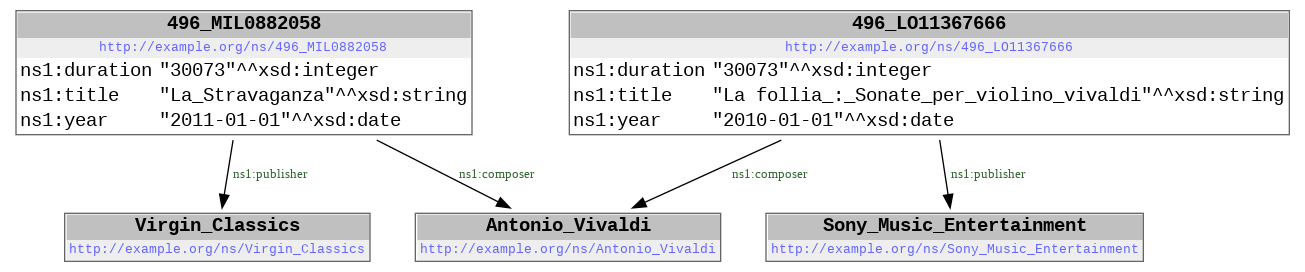

Ο γράφος αυτός περιέχει πληροφορίες για δύο μουσικά κομμάτια, την δισκογραφική που τα κυκλοφόρησε και τον συνθέτη τους. Χρησιμοποιεί δύο 'τεχνητούς' χώρους ονομάτων: http://example.org/ns/ και http://example.org/props/ όπου στον πρώτο ορίζονται τα ονόματα των οντοτήτων ενώ στο δεύτερο τα ονόματα των ιδιοτήτων τους.

Στην python μπορούμε να φορτώσουμε το γράφο με χρήση της βιβλιοθήκης rdflib.

In [ ]:
!pip install rdflib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/10o_εξάμηνο/Γνώση/1ο_μέρος_εργαστηρίου/'

In [ ]:
from rdflib import Graph, Literal, URIRef, Namespace
## Initialization of an empty graph
g = Graph()

## Reading from the file and adding to the graph
g.parse('{}vivaldi.nt'.format(path),format='nt')

## Printing all the nodes
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
La_Stravaganza
http://example.org/ns/496_LO11367666
http://example.org/ns/Antonio_Vivaldi
http://example.org/ns/496_MIL0882058
2010-01-01
30073
http://example.org/ns/Sony_Music_Entertainment
http://example.org/ns/Virgin_Classics
2011-01-01
La follia_:_Sonate_per_violino_vivaldi


Στο γράφο αυτό μπορούμε να διατυπώνουμε SPARQL ερωτήματα όπως φαίνεται στο παρακάτω κελί. 

Ποια μουσικά κομμάτια έχει συνθέσει ο Antonio Vivaldi?

In [ ]:
## Prefixes are defined at the beginning of the query to avoid carrying the namespaces within the query
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:composer ex:Antonio_Vivaldi .
          ?song exp:title ?title
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('La_Stravaganza', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('La follia_:_Sonate_per_violino_vivaldi', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


Στο γράφο επίσης μπορούμε να προσθέσουμε τριάδες

π.χ. για να προσθέσουμε το γεγονός πως ο Antonio Vivaldi γεννήθηκε το 1678-03-04.

In [ ]:
from rdflib.namespace import XSD
## Define the Namespaces
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI of composer
a = URIRef(ns1+"Antonio_Vivaldi")

## URI of the property "date of birth"
b = URIRef(ns2+"date_of_birth")

## URI of date of birth
c = Literal("1678-03-04", datatype = XSD.date)

## Adding the triple a,b,c to the graph.
g.add((a,b,c))

## Printing all the nodes
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
La_Stravaganza
http://example.org/ns/496_LO11367666
http://example.org/ns/Antonio_Vivaldi
http://example.org/ns/496_MIL0882058
2010-01-01
1678-03-04
30073
http://example.org/ns/Sony_Music_Entertainment
http://example.org/ns/Virgin_Classics
2011-01-01
La follia_:_Sonate_per_violino_vivaldi


Παρατηρήστε πως ο κόμβος που αναφέρεται στην οντότητα του κομματιού έχει URI <<http://example.org/ns/496_MIL0882058>> και όχι <<http://example.org/ns/La_Stravaganza>>. Ο τίτλος ενός μουσικού κομματιού είναι ένα string (literal) το οποίο συνδέεται με τον αντίστοιχο κόμβο μέσω της ακμής <<http://example.org/props/title>>. Αν χρειαζόταν να βρούμε το όνομα του συγκεκριμένου κόμβου θα μπορούσαμε να το κάνουμε μέσω SPARQL

In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
       WHERE {
          ?song exp:title "La_Stravaganza"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/496_MIL0882058'),)


όπου το ^^xsd:string υποδηλώνει πως αναφερόμαστε σε literal τύπου string

### Ερώτημα 1.1

Δημιουργήστε έναν νέο γράφο γνώσης (g2) από πληροφορίες που θα βρείτε ψάχνοντας στο αρχείο songs.csv, όμοιο με αυτόν που σας δίνεται, στον οποίο:
- Θα χρησιμοποιούνται τα ίδια namespaces με τον γράφο που δίνεται
- Θα περιέχονται 10 με 20 τριάδες
- Θα περιέχονται τουλάχιστον δύο μουσικά κομμάτια διαφορετικά από αυτά που περιέχονται στο γράφο που δίνεται
- Τουλάχιστον ένας κόμβος του γράφου θα έχει ίδιο URI με έναν κόμβο του γράφου που δίνεται, δηλαδή θα αναφέρεται στο ίδιο αντικείμενο του κόσμου (πχ ένας συνθέτης ή μια δισκογραφική) 

Στη συνέχεια θα διατυπώσετε δύο SPARQL ερωτήματα της επιλογής σας στο γράφο αυτόν, και θα εκτυπώσετε τις απαντήσεις. Περιγράψτε τι κάνει το κάθε ένα από αυτά τα ερωτήματα.

Μπορείτε να δημιουργήσετε το γράφο είτε μέσω του κώδικα όπως δείξαμε και παραπάνω, είτε δημιουργώντας τοπικά ένα αρχείο 'ntriples' (.nt), γράφοντας "με το χέρι" τις τριάδες με τη μορφή που είναι και στο vivaldi.nt,  και μετά φορτώνοντας το αρχείο στο notebook, όπως παρουσιάσαμε και για το δοθέν αρχείο (Graph.parse()). Σε περίπτωση που δημιουργήσετε το νέο γράφο μέσω κώδικα, μην ξεχάσετε να αποθηκεύσετε το γράφο σε ένα αρχείο με κωδικοποίηση 'ntriples' τρέχοντας την εντολή
```python
g2.serialize(destination='mygraph.nt', format='nt')
```
Εκτυπώστε όλες τις τριάδες του γράφου.

**Προσοχή:** Τα κενά και ορισμένοι ειδικοί χαρακτήρες ('/') ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.

In [ ]:
from rdflib import Graph, Literal, URIRef, Namespace

## Initialization of an empty graph
g = Graph()

## Define the namespaces
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI of the musical piece
a = URIRef(ns1+"446_UBO3950831")

## URI of the property "has composer"
b = URIRef(ns2+"composer")

## URI of Nino Rota
c = URIRef(ns1+"Nino_Rota")

## Adding the triple a,b,c to the graph.
g.add((a,b,c))

## Printing all the nodes
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/Nino_Rota
http://example.org/ns/446_UBO3950831


Δμιουργούμε αρχικά ένα σύνολο τριάδων, χρησιμοποιώντας το αρχείο new_songs.csv. Συγκεκριμένα, δημιουργούμε το εξής αρχείο:

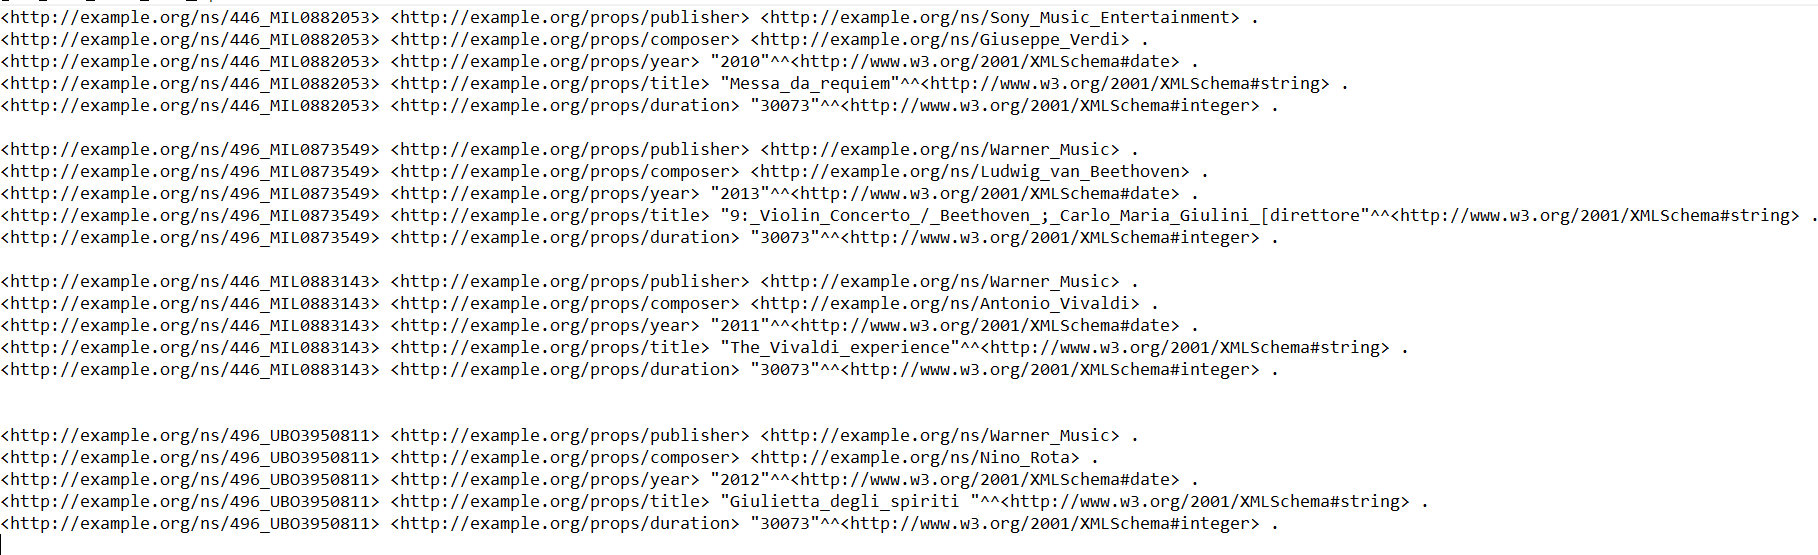



Στην συνέχεια εκτυπώνουμε όλες τις τριάδες του γράφου:

In [ ]:
from rdflib import Graph, Literal, URIRef, Namespace
## Initialization of an empty graph
g = Graph()

## Reading from the file and adding to the graph
g.parse('{}my_graph.nt'.format(path),format='nt')

## Printing all the nodes
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/446_MIL0882053
http://example.org/ns/496_UBO3950811
2012-01-01
http://example.org/ns/Sony_Music_Entertainment
http://example.org/ns/Antonio_Vivaldi
2013-01-01
Messa_da_requiem
Giulietta_degli_spiriti 
http://example.org/ns/Nino_Rota
http://example.org/ns/Ludwig_van_Beethoven
9:_Violin_Concerto_/_Beethoven_;_Carlo_Maria_Giulini_[direttore
The_Vivaldi_experience
http://example.org/ns/Giuseppe_Verdi
2011-01-01
http://example.org/ns/496_MIL0873549
2010-01-01
http://example.org/ns/Warner_Music
30073
http://example.org/ns/446_MIL0883143


Διατυπώνουμε τώρα δύο ερωτήματα SPARQL πάνω στον γράφο που κατασκευάσαμε:

**Ερώτημα 1**:

Ποιά τραγούδια έχουν εκδοθεί από το Warner Music;

In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:publisher ex:Warner_Music .
          ?song exp:title ?title
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('9:_Violin_Concerto_/_Beethoven_;_Carlo_Maria_Giulini_[direttore', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('The_Vivaldi_experience', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('Giulietta_degli_spiriti ', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


**Ερώτημα 2**:

Πόσα τραγούδια έχουν διάρκεια 30073;

In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT (count(distinct ?title) as ?count)
       WHERE {
          ?song exp:duration ?duration .
          ?song exp:title ?title.
          FILTER(?duration = "30073"^^<http://www.w3.org/2001/XMLSchema#integer>)
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('4', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Ερώτημα 1.2

Σε έναν νέο γράφο θα φορτώσετε και τα δύο αρχεία (mygraph.nt, vivaldi.nt) και θα διατυπώσετε ένα SPARQL ερώτημα στην απάντηση του οποίου να φαίνεται πως οι δύο γράφοι είναι συνδεδεμένοι.

Για να φορτώσετε δύο αρχεία στον ίδιο γράφο τρέχετε τις εντολές
```
g = Graph()
g.parse('vivaldi.nt',format='nt')
g.parse('mygraph.nt',format='nt')
```

Φορτώνουμε τους δύο γράφους:

In [ ]:
g = Graph()
g.parse('{}vivaldi.nt'.format(path),format='nt')
g.parse('{}my_graph.nt'.format(path),format='nt')

<Graph identifier=N34f3945d452440fdbad564e3562a81ec (<class 'rdflib.graph.Graph'>)>

Διατυπώνουμε το ερώτημα: Ποια τραγούδια έχουν ως εκδότη το Sony Music Entertainment;

In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:publisher ex:Sony_Music_Entertainment .
          ?song exp:title ?title
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('La follia_:_Sonate_per_violino_vivaldi', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('Messa_da_requiem', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


Διαπιστώνουμεπως το ένα τραγούδι προέρχεται από τον δοσμένο γράφο και το το άλλο από τον γράφο που κατασκευάσαμε. Άρα οι γράφοι είναι συνδεδεμένοι.

## 2o Μέρος: Ανάπτυξη γράφου γνώσης





Σε αυτό το μέρος θα αναπτύξετε το γράφο γνώσης που θα χρησιμοποιηθεί για το σύστημα συστάσεων, αξιοποιώντας ετερογενή δεδομένα από διαφορετικές πηγές. Συγκεκριμένα θα συλλέξετε δεδομένα από:
- Το αρχείο songs.csv που σας δίνεται
- Το γράφο γνώσης [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)

Για την εξαγωγή πληροφορίας από το csv αρχείο μπορείτε να χρησιμοποιήσετε τη βιβλιοθήκη [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

Εδώ να σημειώσουμε ξανά ότι θα σας δοθεί σε δεύτερο χρόνο το εμπλουτισμένο αρχείο new_songs.csv το οποίο θα προκύψει από τη διαδικασία crowdsourcing του θέματος 1β. Με βάση αυτό το αρχείο θα πρέπει να παραδώσετε το τελικό σας θέμα.

In [ ]:
import pandas as pd
df = pd.read_csv('{}new_songs.csv'.format(path)).drop("Unnamed: 0", axis=1)
df.head()

,Europeana ID,Title,Genres,Emotions,Instruments,Year,Duration,Composer,DateOfBirth,DateOfDeath,Biography,Publisher,Place
0,2059210/data_sounds_http___archive_org_downloa...,Selling the Cool Car For You,"Rock, Country","Joy, Calmness","Drums, Electric Guitar",2012,237819,Mick Thomas,1960-02-07,NaN,"Michael James Thomas (born 7 February 1960, Ya...",NaN,Australia
1,9200369/webclient_DeliveryManager_pid_7649526_...,I vespri siciliani,"Opera, Classical","Arousal, Joy",Orchestra,2007,30000,Giuseppe Verdi,1813-10-10,1901-01-27,Giuseppe Fortunino Francesco Verdi (9 or 10 Oc...,Testament,Britain
2,446/MIL0869097,Set me free : ten years after,"Rock, Country","Arousal, Pleasure","Electric Guitar, Drums, Bass",2010,30073,Max Iannantuono,NaN,NaN,NaN,Edel,NaN
3,496/MOD1575994,Sulla strada,Rock,"Arousal, Joy","Electric Guitar, Drums",2009,30073,Massimo Priviero,NaN,NaN,NaN,Universal Music,NaN
4,9200369/webclient_DeliveryManager_pid_9796872_...,Verklarte Nacht op. 4 ; Pelleas und Melisande ...,"Instrumental, Classical","Calmness, Sadness",Orchestra,1998,30049,Arnold Schönberg,NaN,NaN,NaN,Deutsche Grammophon,Berlin


Με την παραπάνω εντολή φορτώσαμε το περιεχόμενο του αρχείου σε ένα *dataframe* το οποίο είναι ουσιαστικά ένας πίνακας. Κάθε στήλη του πίνακα είναι ένα pandas Series - ουσιαστικά μια λίστα. Για να πάρουμε το i-οστό στοιχείο μιας στήλης μπορούμε να γράψουμε (πχ. για τη στήλη 'composer'):
```python
composer = df['Composer'][i]
```
Για να πάρουμε πχ. όλα τα ζεύγη μουσικών κομματιών και συνθετών θα γράφαμε:
```python
for i in range(df.shape[0]):
  song = df['Title'][i]
  composer = df['Composer'][i]
```
Τέλος μπορούμε να φιλτράρουμε ένα dataframe και να κρατήσουμε όσες γραμμές του πίνακα ικανοποιούν κάποια συνθήκη. πχ για να πάρουμε όλες τις γραμμές που αναφέρονται σε κομμάτια που περιέχουν το EMI Classics στις δισκογραφικές:

```python
df_EMI = df[df['publisher'].str.contains('EMI Classics')]
```

Γενικά τα pandas είναι μια πολύ δυνατή βιβλιοθήκη με πάρα πολλές λειτουργίες, και θα βρείτε πολύ υλικό στο διαδίκτυο (documentation, tutorials, παραδείγματα) εάν θέλετε να το ψάξετε παραπάνω.

### Ερώτημα 2.1

Κατασκευάστε έναν γράφο γνώσης για όλα τα μουσικά κομμάτια και με όλες τις πληροφορίες που υπάρχουν στο αρχείο songs.csv που σας δίνεται.

*Προσοχή 1: Σε κάποια πεδία του csv δεν υπάρχουν καταχωρήσεις. Θα πρέπει να γίνεται έλεγχος και να το χειριστείτε κατάλληλα.*   
*Προσοχή 2: Τα κενά και ορισμένοι ειδικοί χαρακτήρες ("/", " ' ") ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.*   

Στην συνέχεια κατασκευάζουμε έναν γράφο από τις πληροφορίες του αρχείου new_songs.csv. Αντικαθιστούμε τους ειδικούς χαρακτήρες και τα κενά με κάτω παύλες.

In [ ]:
# Answer 2.1
## Read csv and create rdf
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace,XSD

g=Graph()

songs = pd.read_csv('{}new_songs.csv'.format(path))

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

# title
for i in range(songs.shape[0]):
  song_id = songs['Europeana ID'][i]
  song_id = song_id.replace(' ','_')
  song_id = song_id.replace('&','_')
  song_id = song_id.replace('/','_')
  song_id = song_id.replace(':','_')
  song_id = song_id.replace(';','_')
  song_id = song_id.replace('\'','_')
  titles = songs['Title'][i]
  titles = titles.replace(' ','_')
  titles = titles.replace('&','_')
  titles = titles.replace('/','_')
  titles = titles.replace(':','_')
  titles = titles.replace(';','_')
  titles = titles.replace('\'','_')
  a = URIRef(ns1+song_id)
  b = URIRef(ns2+'hasTitle')
  c = Literal(titles, datatype=XSD.string)
  g.add((a,b,c))

# genres
for i in range(songs.shape[0]):
  song_id = songs['Europeana ID'][i]
  song_id = song_id.replace(' ','_')
  song_id = song_id.replace('&','_')
  song_id = song_id.replace('/','_')
  song_id = song_id.replace(':','_')
  song_id = song_id.replace(';','_')
  song_id = song_id.replace('\'','_')
  genres = songs['Genres'][i]
  if type(genres)==str:
    genres = genres.replace('/','_')
    genres = genres.replace('&','_')
    genres = genres.replace(':','_')
    genres = genres.replace(';','_')
    genres = genres.replace('\'','_')
    genres = genres.replace(' ','')
    genres=genres.split(',')
    for j in range(len(genres)):
      a = URIRef(ns1+song_id)
      b = URIRef(ns2+'hasGenre')
      genres[j]=genres[j].lower()
      c = URIRef(ns1+genres[j])
      g.add((a,b,c))

# emotions
for i in range(songs.shape[0]):
  song_id = songs['Europeana ID'][i]
  song_id = song_id.replace(' ','_')
  song_id = song_id.replace('&','_')
  song_id = song_id.replace('/','_')
  song_id = song_id.replace(':','_')
  song_id = song_id.replace(';','_')
  song_id = song_id.replace('\'','_')
  emotions = songs['Emotions'][i]
  if type(emotions)==str:
    emotions = emotions.replace('/','_')
    emotions = emotions.replace('&','_')
    emotions = emotions.replace(':','_')
    emotions = emotions.replace(';','_')
    emotions = emotions.replace('\'','_')
    emotions=emotions.replace(' ','')
    emotions = emotions.split(',')
    for j in range(len(emotions)):
      a = URIRef(ns1+song_id)
      b = URIRef(ns2+'hasEmotion')
      emotions[j] = emotions[j].replace(' ','')
      emotions[j] = emotions[j].lower()
      c = URIRef(ns1+emotions[j])
      g.add((a,b,c))

# instruments
for i in range(songs.shape[0]):
  song_id = songs['Europeana ID'][i]
  song_id = song_id.replace(' ','_')
  song_id = song_id.replace('&','_')
  song_id = song_id.replace('/','_')
  song_id = song_id.replace(':','_')
  song_id = song_id.replace(';','_')
  song_id = song_id.replace('\'','_')
  instruments = songs['Instruments'][i]
  if type(instruments)==str:
    instruments = instruments.replace('/','_')
    instruments = instruments.replace('&','_')
    instruments = instruments.replace(':','_')
    instruments = instruments.replace(';','_')
    instruments = instruments.replace('\'','_')
    instruments = instruments.replace(' ','')
    instruments = instruments.split(',')
    for j in range(len(instruments)):
      a = URIRef(ns1+song_id)
      b = URIRef(ns2+'hasInstrument')
      instruments[j] = instruments[j].replace(' ','')
      instruments[j] = instruments[j].lower()
      c = URIRef(ns1+instruments[j])
      g.add((a,b,c))

# year
for i in range(songs.shape[0]):
  song_id = songs['Europeana ID'][i]
  song_id = song_id.replace(' ','_')
  song_id = song_id.replace('&','_')
  song_id = song_id.replace('/','_')
  song_id = song_id.replace(':','_')
  song_id = song_id.replace(';','_')
  song_id = song_id.replace('\'','_')
  year = songs['Year'][i] 
  a = URIRef(ns1+song_id)
  b = URIRef(ns2+'createdIn')
  c = Literal(year, datatype=XSD.date)
  g.add((a,b,c))

# duration
for i in range(songs.shape[0]):
  song_id = songs['Europeana ID'][i]
  song_id = song_id.replace(' ','_')
  song_id = song_id.replace('&','_')
  song_id = song_id.replace('/','_')
  song_id = song_id.replace(':','_')
  song_id = song_id.replace(';','_')
  song_id = song_id.replace('\'','_')
  duration = songs['Duration'][i] 
  a = URIRef(ns1+song_id)
  b = URIRef(ns2+'hasDuration')
  c = Literal(duration, datatype=XSD.integer)
  g.add((a,b,c))

# composer
for i in range(songs.shape[0]):
  song_id = songs['Europeana ID'][i]
  song_id = song_id.replace(' ','_')
  song_id = song_id.replace('&','_')
  song_id = song_id.replace('/','_')
  song_id = song_id.replace(':','_')
  song_id = song_id.replace(';','_')
  song_id = song_id.replace('\'','_')
  composers = songs['Composer'][i]
  if type(composers)==str:
    #print(emotions)
    composers = composers.replace('/','_')
    composers = composers.replace('&','_')
    composers = composers.replace(':','_')
    composers = composers.replace(';','_')
    composers = composers.replace('\'','_')
    composers = composers.replace(' ','_')
    composers = composers.split(',')
    for j in range(len(composers)):
      a = URIRef(ns1+song_id)
      b = URIRef(ns2+'hasComposer')
      c = URIRef(ns1+composers[j])
      g.add((a,b,c))

# birthdate
for i in range(songs.shape[0]):
  composer_id = songs['Composer'][i]
  if type(composer_id)==str:
    composer_id = composer_id.replace('/','_')
    composer_id = composer_id.replace('&','_')
    composer_id = composer_id.replace(':','_')
    composer_id = composer_id.replace(';','_')
    composer_id = composer_id.replace('\'','_')
    composer_id = composer_id.replace(' ','_')
    date = songs['DateOfBirth'][i]
    if type(date)==str:
      a = URIRef(ns1+composer_id)
      b = URIRef(ns2+'wasBornIn')
      c = Literal(date, datatype=XSD.date)
      g.add((a,b,c))

# deathdate
for i in range(songs.shape[0]):
  composer_id = songs['Composer'][i]
  if type(composer_id)==str:
    composer_id = composer_id.replace('/','_')
    composer_id = composer_id.replace('&','_')
    composer_id = composer_id.replace('&','_')
    composer_id = composer_id.replace(':','_')
    composer_id = composer_id.replace(';','_')
    composer_id = composer_id.replace('\'','_')
    composer_id = composer_id.replace(' ','_')
    date = songs['DateOfDeath'][i]
    if type(date)==str:
      a = URIRef(ns1+composer_id)
      b = URIRef(ns2+'diedIn')
      c = Literal(date, datatype=XSD.date)
      g.add((a,b,c))

# biography
for i in range(songs.shape[0]):
  composer_id = songs['Composer'][i]
  if type(composer_id)==str:
    composer_id = composer_id.replace('/','_')
    composer_id = composer_id.replace('&','_')
    composer_id = composer_id.replace(':','_')
    composer_id = composer_id.replace(';','_')
    composer_id = composer_id.replace('\'','_')
    composer_id = composer_id.replace(' ','_')
    
    biography = songs['Biography'][i]
    if type(biography)==str:
      biography = biography.replace(' ','_')
      biography = biography.replace('&','_')
      biography = biography.replace('/','_')
      biography = biography.replace(':','_')
      biography = biography.replace(';','_')
      biography = biography.replace('\'','_')
      a = URIRef(ns1+composer_id)
      b = URIRef(ns2+'Biography')
      c = Literal(biography, datatype=XSD.string)
      g.add((a,b,c))

# composer
for i in range(songs.shape[0]):
  song_id = songs['Europeana ID'][i]
  song_id = song_id.replace(' ','_')
  song_id = song_id.replace('&','_')
  song_id = song_id.replace('/','_')
  song_id = song_id.replace(':','_')
  song_id = song_id.replace(';','_')
  song_id = song_id.replace('\'','_')
  publisher = songs['Publisher'][i]
  if type(publisher)==str:
    #print(emotions)
    publisher = publisher.replace('/','_')
    publisher = publisher.replace('&','_')
    publisher = publisher.replace(':','_')
    publisher = publisher.replace(';','_')
    publisher = publisher.replace('\'','_')
    publisher = publisher.replace(' ','_')
    publisher = publisher.split(',')
    for j in range(len(publisher)):
      a = URIRef(ns1+song_id)
      b = URIRef(ns2+'hasPublisher')
      c = URIRef(ns1+publisher[j])
      g.add((a,b,c))

# place
for i in range(songs.shape[0]):
  place = songs['Place'][i]
  if type(place)==str:
    #print(emotions)
    place = place.replace('/','_')
    place = place.replace('&','_')
    place = place.replace(':','_')
    place = place.replace(';','_')
    place = place.replace('\'','_')
    place = place.replace(' ','_')
    place = place.split(',')
    for j in range(len(place)):
      a = URIRef(ns1+song_id)
      b = URIRef(ns2+'createdAt')
      c = URIRef(ns1+place[j])
      g.add((a,b,c))

In [ ]:
for node in g.all_nodes():
  print(node)

http://example.org/ns/Maxiata
Canzoni_per_me_
1996
http://example.org/ns/Riz_Ortolani
http://example.org/ns/9200369_webclient_DeliveryManager_pid_8383346_custom_att_2_simple_viewer
Der_Ring_des_Nibelungen
Variety_Hour
Samuel_Osmond_Barber_II_(March_9,_1910_–_January_23,_1981)_was_an_American_composer_of_orchestral,_opera,_choral,_and_piano_music._He_is_one_of_the_most_celebrated_composers_of_the_20th_century__music_critic_Donal_Henahan_stated_that_"Probably_no_other_American_composer_has_ever_enjoyed_such_early,_such_persistent_and_such_long-lasting_acclaim."_His_Adagio_for_Strings_(1936)_has_earned_a_permanent_place_in_the_concert_repertory_of_orchestras._He_was_awarded_the_Pulitzer_Prize_for_Music_twice__for_his_opera_Vanessa_(1956–57)_and_for_the_Concerto_for_Piano_and_Orchestra_(1962)._Also_widely_performed_is_his_Knoxville__Summer_of_1915_(1947),_a_setting_for_soprano_and_orchestra_of_a_prose_text_by_James_Agee._At_the_time_of_his_death,_nearly_all_of_his_compositions_had_been_rec

In [ ]:
g.serialize(destination='{}partTwoGraph.nt'.format(path), format='nt')

/usr/local/lib/python3.7/dist-packages/rdflib/plugins/serializers/nt.py:37: UserWarning: NTSerializer always uses UTF-8 encoding. Given encoding was: None
  "NTSerializer always uses UTF-8 encoding. "


<Graph identifier=Ncb5fbf79fdaf409f9c36af40c000d9fb (<class 'rdflib.graph.Graph'>)>

### Ερώτημα 2.2


Για την ανάκτηση πληροφορίας από το γράφο των Wikidata θα κάνετε SPARQL queries στο SPARQL endpoint που διαθέτουν. Συγκεκριμένα μέσω της βιβλιοθήκης requests της python, θα στέλνετε ένα http GET request με δύο παραμέτρους:  

*   '*format*' που καθορίζει σε τί μορφή θα έρθει η απάντηση (json), και
*   '*query*' που περιέχει το SPARQL ερώτημα που θέλουμε να απαντηθεί.

Για παράδειγμα το παρακάτω κομμάτι κώδικα δημιουργεί το κατάλληλο SPARQL query και "χτυπάει" το Wikidata SPARQL endpoint για να πάρουμε όλους τους κόμβους του γράφου που έχουν σε κάποιο από τα αγγλικά (@en) labels τους (skos:altLabel|skos:prefLabel|rdfs:label) τη συμβολοσειρά "Wolfgang Amadeus Mozart". 

Προσοχή! τα labels είναι case sensitive και απαιτούν να προσδιορίζεται και η γλώσσα του label, π.χ. εδω Αγγλικά (@en)! 

In [ ]:
import requests

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Wolfgang Amadeus Mozart\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})


Ύστερα, για να πάρουμε τις απαντήσεις διαβάζουμε το json που επεστράφη:

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q254


Μπορείτε να κάνετε δοκιμές για τα SPARQL queries προς Wikidata στο [Wikidata Query Service](https://query.wikidata.org/). 

**Χρήσιμοι σύνδεσμοι:**

[Wikidata:SPARQL query service](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service) και όλοι οι σύνδεσμοι που βρίσκονται στο κομμάτι "Learning SPARQL", με κυριότερους τους:

[SPARQL Tutorial](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)

[SPARQL query service/queries](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries) 

[SPARQL query service/queries/examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples).

Όμοια τώρα με τη συμβολοσειρά "Giuseppe Verdi".

In [ ]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

12
http://www.wikidata.org/entity/Q3771609
http://www.wikidata.org/entity/Q7317
http://www.wikidata.org/entity/Q1768473
http://www.wikidata.org/entity/Q3771608
http://www.wikidata.org/entity/Q3771610
http://www.wikidata.org/entity/Q52808313
http://www.wikidata.org/entity/Q52824268
http://www.wikidata.org/entity/Q52831519
http://www.wikidata.org/entity/Q52832471
http://www.wikidata.org/entity/Q52856219
http://www.wikidata.org/entity/Q52942600
http://www.wikidata.org/entity/Q52989468


#### 2.2.1 Ποιά βασική διαφορά παρατηρείτε ως προς το σύνολο απαντήσεων για την περίπτωση της συμβολοσειράς Wolfgang Amadeus Mozart και Giuseppe Verdi αντίστοιχα;  

Answer 2.2.1:

Η βασική διαφορά που παρατηρούμε ως προς τα δύο σύνολα απαντήσεων είναι πως στην περίπτωση της συμβολοσειράς Wolfgang Amadeus Mozart επιστρέφεται ένας κόμβος, ενώ στην περίπτωση της συμβολοσειράς Giuseppe Verdi επιστρέφονται πολλαπλοί κόμβοι του γράφου. Ο λόγος που συμβαίνει αυτό είναι πως το ερώτημα SPARQL που μας έχει δοθεί αναζητά κόμβους των οποίων το label περιέχει τη δοσμένη συμβολοσειρά. Έτσι, σε περιπτώσεις πολλαπλών κόμβων που την περιέχουν (π.χ. περίπτωση συνωνυμίας) επιστρέφονται πολλαπλοί κόμβοι. Έτσι, παρατηρούμε για παράδειγμα πως στην περίπτωση της συμβολοσειράς Giusepper Verdi δεν επιστρέφεται μόνο ο συνθέτης, αλλά και άλλα αντικείμενα, όπως για παράδειγμα ομώνυμες ταινίες, σχολεία κ.α.

#### 2.2.2 Εάν ψάχναμε (μόνο) την οντότητα του  συνθέτη Wolfgang Amadeus Mozart το παραπάνω query σύμφωνα με το label είναι αρκετό; Για την περίπτωση του συνθέτη Giuseppe Verdi;  
 

Answer 2.2.2:

Με βάση το παραπάνω ερώτημα, καθώς για τον συνθέτη Wolfgang Amadeus Mozart επιστρέφεται μόνο ένα αποτέλεσμα, θα ήταν αρκετό το παραπάνω query σύμφωνα με το label. Αντίθετα, για τον συνθέτη Giuseppe Verdi, το παραπάνω query δε θα ήταν αρκετό, καθώς λαμβάνουμε με αυτό πολλαπλά αποτελέσματα από τα οποία ένα μόνο είναι επιθυμητό.

#### 2.2.3 Από τη σελίδα των wikidata για τον συνθέτη Giuseppe Verdi μπορείτε να εντοπίσετε κάποια χαρακτηριστικά (αναφέρονται ως Statements στη σελίδα των Wikidata) που τον διαφοροποιούν από τις υπόλοιπες οντότητες που μας επέστρεψε το παραπάνω query; Δώστε τουλάχιστον δύο (2) παραδείγματα. 

Answer 2.2.3:


Ένα από τα χαρακτηριστηκά που τον διαφοροποιεί είναι το γεγονός πως είναι άνθρωπος (instance of: human). Τα υπόλοιπα αποτελέσματα είναι κυρίως σχολεία και ταινίες. Άλλα χαρακτηρηστικά είναι η ημερομηνία γέννησης του, το όνομα της συζύγου του, το γεγονός πως είναι συνθέτης κ.α.

#### Σύνθετα Queries
Για να κάνουμε πιο σύνθετα ερωτήματα πρέπει να ξέρουμε τα αναγνωριστικά των ιδιοτήτων και των κόμβων όπως είναι ορισμένα στα Wikidata. Αυτά μπορούμε να τα ανακτήσουμε είτε με SPARQL ερωτήματα όπως το παραπάνω, ή ψάχνοντας "χεράτα" στα Wikidata. Για παράδειγμα η ιδιότητα "είναι" (instance of) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P31) και έχει αναγνωριστικό ([wikidata identifier](https://www.wikidata.org/wiki/Wikidata:Identifiers)) P31. Η έννοια "μουσικό είδος" (music genre) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q188451) και έχει αναγνωριστικό Q188451.  
Έτσι εάν ψάχνουμε την οντότητα του μουσικού είδους "opera" εάν κάνουμε αναζήτηση μόνο με το label θα δούμε πως επιστρέφονται μαζί κι άλλες οντότητες οι οποίες δεν μας ενδιαφέρουν αυτή τη στιγμή. Για αυτό δημιουργούμε ένα πιο σύνθετο query στο οποίο υπάρχει η απαίτηση οι οντότητες που θα επιστραφούν να "είναι" (instance of) μουσικά είδη. 

*Προσοχή στα prefixes! Χρησιμοποιούμε wd για τις οντότητες και wdt για τις ιδιότητες (see "Our first query" [here](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)), αυτά είναι τα μόνα που θα μας χρειαστούν στο πλαίσιο της παρούσας άσκησης.*

In [ ]:
# Simple query by label (only)

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"opera\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

3
http://www.wikidata.org/entity/Q1344
http://www.wikidata.org/entity/Q1592769
http://www.wikidata.org/entity/Q3354534


In [ ]:
# More "complex" query by label and "instance of"

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"opera\"@en .
            ?uri wdt:P31 wd:Q188451.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


1
http://www.wikidata.org/entity/Q1344


Σε συνέχεια των παραπάνω ερωτήσεων (2.2.1 - 2.2.3):  

#### 2.2.4. Προσπαθήστε να δημιουργήσετε ένα SPARQL query με βάση τις παρατηρήσεις σας στο 2.2.3 που να επιστρέφει μόνο την οντότητα του συνθέτη Giuseppe Verdi. 
Σε μια σελίδα wikidata μπορείτε να δείτε το αναγνωριστικό μιας εννοιας (wikidata identifier) αφήνοντας (hovering) τον κέρσορα πάνω από το όνομά της όπως εμφανίζεται στα Statements, καθώς και να πλοηγηθείτε στην αντίστοιχη σελίδα πατώντας πάνω στο όνομα-σύνδεσμο.

Χρησιμοποιούμε την ιδιότητα occupation, και δηλώνουμε ότι πρέπει το αντικείμενο που αναζητούμε να έχει επάγγλεμα συνθέτης.

In [ ]:
# Answer 2.2.4

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en .
            ?uri wdt:P106 wd:Q36834.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7317


#### 2.2.5. Μπορείτε να τροποποιήσετε το αρχικό query που χρησιμοποιεί μόνο τα labels ώστε να επιστρέφεται μόνο η επιθυμητή οντότητα όπως στο 2.2.4;  

<!-- Hint for 2.2.5: "Also known as..." -> altLabel -->

Χρησιμοποιούμε το εναλλακτικό label (altLabel) του συγκεκριμένου συνθέτη (also known as στο Wikidata). Συγκεκριμένα, ο συνθέτης έχει εναλλακτικό label το "Giuseppe Fortunino Francesco Verdi", το οποίο και είναι μοναδικό, σε αντίθεση με τη συμβολοσειρά Giuseppe Verdi.

In [ ]:
# Answer 2.2.5
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Fortunino Francesco Verdi\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7317


#### 2.2.6 Βρείτε την έννοια του συνθέτη Igor Stravinsky στο γράφο των wikidata "χεράτα" (μέσω απλης αναζήτησης στο διαδίκτυο) και δώστε το link για την αντίστοιχη σελίδα στα wikidata.  

Answer 2.2.6:

Το link είναι: https://www.wikidata.org/wiki/Q7314. Βρήκαμε το link αυτό αναζητώντας "Igor Stravinsky Wikidata" στο Google.

##### **Hint:** 

https://lmgtfy.app/?q=igor+stravinsky+wikidata

#### 2.2.7 Δημιουργήστε ένα ερώτημα SPARQL για να πάρετε την ίδια έννοια (του συνθέτη Igor Stravinsky) μέσω του ονόματός του (label). 


In [ ]:
# Answer 2.2.7

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Igor Stravinsky\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

4
http://www.wikidata.org/entity/Q7314
http://www.wikidata.org/entity/Q47510844
http://www.wikidata.org/entity/Q64157680
http://www.wikidata.org/entity/Q79946813


#### 2.2.8 Το ερώτημα που σχηματίσατε επιστρέφει την επιθυμητή οντότητα;  
#### Επιστρέφει μόνο την επιθυμητή οντότητα;  


Answer 2.2.8:

Το ερώτημα που σχηματίσαμε δεν επιστρέφει μόνο την οντότητα του συνθέτη, αλλά και τρεις ακόμα οντότητες και συγκεκριμένα έναν πίνακα και δύο φωτογραφίες.

#### 2.2.9 Εάν όχι με ποιούς τρόπους θα μπορούσατε να πάρετε μόνο την επιθυμητή οντότητα; διαμορφώστε το κατάλληλο SPARQL query κι επιβεβαιώστε.  
Εάν στο προηγούμενο ερώτημα επιστρέφεται μόνο η επιθυμητή οντότητα τότε μπορείτε να παραλείψετε αυτό το ερώτημα.  


Answer 2.2.9:

Μπορούμε ξανά να χρησιμοποιούμε την ιδιότητα occupation, αναζητώντας συνθέτη.

In [ ]:
# Answer 2.2.9

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Igor Stravinsky\"@en .
            ?uri wdt:P106 wd:Q36834.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7314


#### 2.2.10 Υπάρχει τρόπος να πάρετε μόνο την επιθυμητή οντότητα αποκλειστικά μέσω των labels (όπως στα παραπάνω παραδείγματα με τους Giuseppe Verdi και Wolfgang Amadeus Mozart); Εάν ναι, δημιουργήστε το κατάλληλο query.  


Answer 2.2.10:

Χρησιμοποιούμε ξανά ένα από τα εναλλακτικά labels για τον συγκεκριμένο συνθέτη, το οποίο και είναι μοναδικό.

In [ ]:
# Answer 2.2.10

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Igor Fyodorovich Stravinsky\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7314


Η ιδιότητα "εργάζεται" (occupation) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P106) και έχει αναγνωριστικό P106. Το επάγγελμα του συνθέτη περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q36834) και έχει αναγνωριστικό Q36834. Η ιδιότητα "χώρα πολιτογράφησης" βρίσκεται εδώ με αναγνωριστικό P27. Η χώρα "Γαλλία" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q142) με αναγνωριστικό Q142. Η ιδιότητα "έχει συνθέσει" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P86) με αναγνωριστκό P86. Η ιδιότητα "έχει κερδίσει βραβείο" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P166) με αναγνωριστικό P166, και τέλος τα βραβεία Grammy περιγράφονται [εδώ](https://www.wikidata.org/wiki/Q41254) με αναγνωριστικό Q41254.



#### 2.2.11 Δημιουργήστε ένα ερώτημα SPARQL προς το wikidata SPARQL endpoint για να πάρουμε όλους τους συνθέτες που έχουν γαλλική υπηκοότητα οι οποίοι να έχουν κερδίσει βραβείο Grammy (οποιασδήποτε κατηγορίας). Οι οντότητες που αναφέρονται παραπάνω είναι αρκετές για αυτό το ερώτημα. 
**Περιγράψτε το query που δημιουργήσατε.**



Answer 2.2.11:

In [ ]:
# Answer 2.2.11

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?uri 
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?grammy.
            ?grammy wdt:P361 wd:Q41254.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

6
http://www.wikidata.org/entity/Q471656
http://www.wikidata.org/entity/Q7314
http://www.wikidata.org/entity/Q206244
http://www.wikidata.org/entity/Q231276
http://www.wikidata.org/entity/Q105487
http://www.wikidata.org/entity/Q313362


Αναζητούμε uri τα οποία αντιστοιχούν σε συνθέτη άτομο με occupation composer, country of citizenship; France, που έχουν κάποιο award το οποίο έχει την ιδιότητα: "part of: Grammy Award" (αφού όλα τα Grammys θα είναι μέρος Grammy Award).

#### 2.2.12 Τροποποιήστε το παραπάνω query (2.2.11) ωστε να επιστρέφει το πλήθος των συνθετών. 

Τροποποιούμε το παραπάνω ερώτημα μετρώντας το πλήθος των διαφορετικών συνθετών που επιστρέφονται, με χρήση του "COUNT".

In [ ]:
# Answer 2.2.12

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT (COUNT (DISTINCT ?uri) AS ?count) 
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?grammy.
            ?grammy wdt:P361 wd:Q41254.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
for entity in data["results"]["bindings"]:
  print(entity['count']['value'])

6


##### **Hint 1**:  

COUNT

##### **Hint 2:**

 Η απάντηση είναι 6. 
<!-- Hidden hint: use DISTINCT -->

#### 2.2.13 Τροποποιήστε το query που κατασκευάσατε στο 2.2.11 ώστε να επιστρέφει **τους τίτλους** των βραβείων Grammy.

Για καθένα από τα Grammys τυπώνουμε την ετικέτα αυτού στα Αγγλικά.

In [ ]:
# Answer 2.2.13

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT DISTINCT ?label
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?grammy.
            ?grammy wdt:P361 wd:Q41254.
            ?grammy rdfs:label ?label.
      
            filter langMatches( lang(?label), "EN" ) 
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
for entity in data["results"]["bindings"]:
  print(entity['label']['value'])

Grammy Award for Best World Music Album
Grammy Lifetime Achievement Award
Grammy Award for Best Dance Recording
Grammy Award for Best Classical Album
Grammy Award for Best Classical Contemporary Composition
Grammy Award for Best Score Soundtrack for Visual Media
Grammy Award for Best Orchestral Performance



#### 2.2.14 Τροποποιήστε το query του 2.2.11 ώστε (από τους συνθέτες που επέστρεψε προηγουμένως) να επιστρέφει μόνο συνθέτες που έχουν κερδίσει πάνω από ένα (1) βραβείο Grammy.  


Τροποποιούμε το παραπάνω query του 2.2.11 ώστε Grammy ίδιας κατηγορίας που δόθηκαν σε έναν συνθέτη πολλαπλές φορές να μετρούν ξεχωριστά, λαμβάνοντας την χρονική στιγμή στην οποία ένα Grammy δόθηκε στον συνθέτη. Επιπλέον, μετράμε το πλήθος Grammys ανά συνθέτη και επιστρέφουμε μόνο τους συνθέτες με πάνω από ένα.

In [ ]:
# Answer 2.2.14
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT  ?uri (COUNT (?grammy) AS ?count) 
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri p:P166 ?grammystatement.
            ?grammystatement ps:P166 ?grammy.
            ?grammy wdt:P361 wd:Q41254.
            ?grammystatement pq:P585 ?time.
            }
            GROUP BY ?uri
            HAVING (?count>1) 
            """
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
for entity in data["results"]["bindings"]:
  print(entity['uri']['value'])

http://www.wikidata.org/entity/Q231276
http://www.wikidata.org/entity/Q7314


#### 2.2.15 Τροποποιήστε το query του ερωτήματος 2.2.13 ώστε να επιστρέφει τους συνθέτες ταξινομημένους  ως προς το πλήθος των βραβείων Grammy σε φθίνουσα σειρά: πρώτος ο συνθέτης με τα περισσότερα βραβεία, καθώς και την αντίστοιχη τιμή του πλήθους των βραβείων.

Το ερώτημα διαμορφώνεται ως εξής:

In [ ]:
# Answer 2.2.15

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT  ?uri (COUNT (?grammy) AS ?count) 
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri p:P166 ?grammystatement.
            ?grammystatement ps:P166 ?grammy.
            ?grammy wdt:P361 wd:Q41254.
            ?grammystatement pq:P585 ?time.
            }
            GROUP BY ?uri 
            ORDER BY DESC(?count)
            """
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
for entity in data["results"]["bindings"]:
  print(entity['uri']['value'],entity['count']['value'])

http://www.wikidata.org/entity/Q7314 8
http://www.wikidata.org/entity/Q231276 4
http://www.wikidata.org/entity/Q206244 1
http://www.wikidata.org/entity/Q471656 1
http://www.wikidata.org/entity/Q105487 1
http://www.wikidata.org/entity/Q313362 1


#### 2.2.16 Δημιουργήστε ένα query προς τα Wikidata το οποίο επιστρέφει τις οντότητες των συνθετών, καθώς και το όνομά τους, οι οποίοι έχουν κερδίσει έστω κι ένα βραβείο Grammy (οποιασδήποτε κατηγορίας) και έχουν συνθέσει τουλάχιστον 20 μουσικά κομμάτια, σε φθίνουσα σειρά ως προς το πλήθος των Grammy που έχουν κερδίσει. Εκτυπώστε τις οντότητες μαζί με το αντίστοιχο όνομα και τον αριθμό των μουσικών κομματιών που έχουνε συνθέσει.

Τροποποιούμε το query του 2.2.15, αφαιρώντας τον περιορισμό γαλλικής υπηκότητας και λαμβάνοντας επιπλέον την ετικέτα του αντικειμένου κάθε συνθέτη. Ακόμα, για να ελέγξουμε ότι ο συνθέτης έχει δημιουργήσει τουλάχιστον 20 μουσικά κομμάτια, αναζητούμε όλα αντικείμενα που είναι μουσικά κομμάτια και έχουν συνθέτη τον συγκεκριμένο κάθε φορά συνθέτη και μετράμε το πλήθος τους.

In [ ]:
# Answer 2.2.16

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri (SAMPLE(?name) AS ?name)  (COUNT (distinct ?grammystatement) AS ?grammycount) (COUNT (distinct ?music) AS ?musiccount) 
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri p:P166 ?grammystatement.
            ?uri rdfs:label ?name.
            ?grammystatement ps:P166 ?grammy.
            ?grammy wdt:P361 wd:Q41254.
            ?grammystatement pq:P585 ?time.
            ?music wdt:P31 wd:Q105543609.
            ?music wdt:P86 ?uri.
            filter langMatches( lang(?name), "EN" ) 
            }
            GROUP BY ?uri 
            HAVING (?musiccount>19)
            ORDER BY DESC(?grammycount)
            """
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

Επιστρέφουμε τις οντότητες (uri) των συνθετών, το όνομά τους, ενώ προσθέτουμε επιπλέον το πλήθος Grammys που έχουν κερδίσει, καθώς και το πλήθος κομματιών που έχουν συνθέσει.

In [ ]:
data = r.json()
for entity in data["results"]["bindings"]:
  print(entity['uri']['value'],entity['name']['value'],entity['grammycount']['value'],entity['musiccount']['value'])

http://www.wikidata.org/entity/Q317272 Alan Menken 9 72
http://www.wikidata.org/entity/Q7314 Igor Stravinsky 8 102
http://www.wikidata.org/entity/Q392 Bob Dylan 7 158
http://www.wikidata.org/entity/Q1744 Madonna 6 30
http://www.wikidata.org/entity/Q180453 Dolly Parton 6 32
http://www.wikidata.org/entity/Q231276 Angélique Kidjo 4 44
http://www.wikidata.org/entity/Q103767 Charlie Parker 3 82
http://www.wikidata.org/entity/Q269094 Richard Rodgers 3 94
http://www.wikidata.org/entity/Q2599 Paul McCartney 2 208
http://www.wikidata.org/entity/Q4030 Duke Ellington 2 45
http://www.wikidata.org/entity/Q212762 Burt Bacharach 2 31
http://www.wikidata.org/entity/Q542484 Stephen Schwartz 2 21
http://www.wikidata.org/entity/Q2419093 Robert B. Sherman 2 26
http://www.wikidata.org/entity/Q217787 Carole King 2 24
http://www.wikidata.org/entity/Q312674 Giorgio Moroder 2 25
http://www.wikidata.org/entity/Q714 Stevie Wonder 1 21
http://www.wikidata.org/entity/Q5383 David Bowie 1 33
http://www.wikidata.org/

### Ερώτημα 2.3
Εμπλουτίστε το γράφο που κατασκευάσατε στο προηγούμενο ερώτημα, προσθέτοντας επιπλέον πληροφορία από το γράφο των Wikidata.

Συγκεκριμένα:  
#### 2.3.1: Προσθέστε αρχικά όσες ημερομηνίες θανάτου και γέννησης των συνθετών υπάρχουν και μπορείτε.  
#### 2.3.2: Διαμορφώστε κατάλληλο SPARQL query προς το γράφο σας για να ελέγξετε πόσες ημερομηνίες βρήκατε.  
#### 2.3.3: Στη συνέχεια μπορείτε να προσθέσετε στο γράφο σας ό,τι πληροφορία κρίνετε εσείς σχετική και χρήσιμη, διαμορφώνοντας (τουλάχιστον 3) κατάλληλα SPARQL queries προς τα wikidata, και προσθέτοντας την αντίστοιχη πληροφορία μαζικά στο γράφο σας. Έχετε κατά νου πως ο συγκεκριμένος γράφος θα χρησιμοποιηθεί στη συνέχεια για να αναπτύξετε έναν recommender άρα να σκεφθείτε διάφορα χαρακτηριστικά που θα μπορούσαν να φανούν χρήσιμα.  

Για κάθε συνθέτη του γράφου σας μπορείτε να βρείτε την αντίστοιχη οντότητα στα wikidata μέσω κατάλληλων ερωτημάτων SPARQL μέσω του ονόματος του και της ιδιότητας "εργάζεται". Τα labels που θα γίνει η αναζήτηση συνίσταται να είναι στα αγγλικά (@en) και η ιδιότητα "εργάζεται" να έχει πολλαπλές τιμές (π.χ. composer ή musician).

*Προσοχή 1: όποια πληροφορία προσθέτετε στο γράφο πρέπει να είναι συνεπής, δηλαδή εάν εμπλουτίσετε το γράφο με νέα πληροφορία πριν δημιουργήσετε νέες οντότητες πρέπει να σιγουρευτείτε πως δεν υπάρχουν ήδη, διότι μπορεί να δημιουργήσετε ένα γράφο όπου υπάρχουν πολλά διαφορετικά ονόματα (άρα και κόμβοι του γράφου) όπου αναφέρονται όμως στην ίδια έννοια. Δηλαδή εάν θέλετε να προσθέσετε την πληροφορία πως ο Antonio Vivaldi έχει συνθέσει το μουσικό κομμάτι La Stravaganza πρέπει πρώτα να ελέγξετε εάν υπάρχει ήδη η οντότητα που αντιστοιχεί στον συνθέτη Antonio Vivaldi, εάν δεν υπάρχει να τη δημιουργήσετε, και στη συνέχεια να προσθέσετε την αντίστοιχη ιδιότητα (hasComposer για παράδειγμα) στην οντότητα του μουσικού κομματιού La Stravaganza.* 

*Προσοχή 2: είναι πολύ πιθανό η πληροφορία που αναζητείτε να μην υπάρχει σε όλες τις οντότητες των wikidata, άρα θα πρέπει να διαχειριστείτε κατάλληλα τις αντίστοιχες απαντήσεις (πιθανότατα θα έχει κάποια απάντηση της μορφής None).*

*Προσοχή 3: Το wikidata δεν αφήνει να γίνονται πάνω από 30 queries το λεπτό. Για να κάνετε μαζικά queries θα πρέπει να περιμένετε 2 δευτερόλεπτα μετά από κάθε query με* ```time.sleep()```

*Προσοχή 4: Ορισμένοι συνθέτες είναι μουσικά συγκροτήματα, άρα δεν έχουν ημερομηνίες γέννησης και θανάτου.*

<!-- Hint: Μια καλή ιδέα για τον εμπλουτισμό του γράφου θα ήταν η προσθήκη μιας ιδιότητας που να αναφέρεται στην περίοδο ίδρυσης ενός μουσικού συγκροτήματος. Αυτό είναι σημαντικό για ένα σύστημα συστάσεων γιατί όπως η πληροφορία για τις ημερομηνίες γέννησης και θανάτου ενός συνθέτη, μπορεί να μας πει πότε περίπου γράφτηκε ένα μουσικό κομμάτι.-->


#### 2.3.1

Ελέγχουμε αρχικά πόσες ημερομηνίες γέννησης και θανάτου έχουμε για τους συνθέτες στον γράφο μας:

In [ ]:
# Answer 2.3
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?date
       WHERE {
          ?composer exp:wasBornIn ?date .
       }""")
#for a in ans:
#  print(a)
print(len(ans))


90


In [ ]:
# Answer 2.3
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?date
       WHERE {
          ?composer exp:diedIn ?date .
       }""")
#for a in ans:
#  print(a)
print(len(ans))

44


Μετράμε επιπλέον το πλήθος των συνθετών:

In [ ]:
composers=set()
for i in range(songs.shape[0]):
  composer_id = songs['Composer'][i]
  if type(composer_id)==str:
    composers.add(composer_id)
print(len(composers))

261


Διαπιστώνουμε λοιπόν πως δεν διαθέτουμε την πληροφορία για την ημερομηνία γέννησης και την ημερομηνία θανάτου για όλους τους συνθέτες. Για τον λόγο αυτό θα εμπλουτίσουμε τον γράφο μας χρησιμοποιώντας πληροφορίες από το Wikidata. 

Για τον σκοπό αυτό αναζητούμε αρχικά με την συνάρτηση get_composer_birthdate() την ημερομηνία γένησης ενός ατόμου που είναι συνθέτης και έχει το ζητούμενο όνομα. Εκτελούμε το αντίστοιχο query και αν λάβουμε ένα μόνο αποτέλεσμα το επιστέφουμε. Σημειώνουμε όμως πως προκύπτουν περιπτώσεις κατά τις οποίες δύο συνθέτες μπορεί να έχουν το ίδιο όνομα. Προκειμένου να διακρίνουμε ποιον από τους δύο συνθέτες (ή και περισσότερους) έχουμε στον γράφο μας, προσδιορίζουμε τα τραγούδια που έχουν τον συγκεκριμένο ως συνθέτη στο γράφο μας και αναζητούμε τον αντίστοιχο πόρο για κάθε τραγούδι στο Wikidata. Αν βρούμε τον πόρο με τίτλο ίδιο με αυτόν του τραγουδιού και συνθέτη με όνομα το όνομα του συνθέτη την ημερομηνία γέννησης του οποίου ψάχνουμε, τότε έχουμε προσδιορίσει τον σωστό από τους ομώνυμους συνθέτες και επιστρέφουμε την ημερομηνία γένησής του. Αν όμως δεν μπορέσουμε να βρούμε κάποιο από τα τραγούδια του συνθέτη για του οποίου το όνομα υπάρχει συνωνυμία στο Wikidata, τότε δεν μπορούμε να γνωρίζουμε ποιος από τους ομώνυμους συνθέτες είναι ο επιθυμητός. Για τον λόγο αυτό δεν επιστρέφουμε καμία ημερομηνία γένησης. 

Ακριβώς αντίστοιχα δημιουργούμε την συνάρτηση get_composer_deathdate() για την ημερομηνία θανάτου ενός συνθέτη.

In [ ]:
import time 

def get_composer_birthdate(composer):

  time.sleep(4)
  
  # get birthdate of composer
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  query = """SELECT ?birthdate ?uri
            WHERE {
              ?uri skos:altLabel|skos:prefLabel|rdfs:label \""""+composer+"""\"@en .
              ?uri wdt:P106 wd:Q36834.
              ?uri wdt:P569 ?birthdate
              }"""
  
  r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  
  data = r.json()
  
  # no result
  if len(data["results"]["bindings"])<1:
    return None

  # only one birth date, so one composer with this name
  if len(data["results"]["bindings"])==1:
    return data['results']['bindings'][0]['birthdate']['value']
  
  # more than one composers: get songs of composer in our graph
  if len(data["results"]["bindings"])>1:
    composer_old=composer
    composer = composer.replace('/','_')
    composer = composer.replace('&','_')
    composer = composer.replace(':','_')
    composer = composer.replace(';','_')
    composer = composer.replace('\'','_')
    composer = composer.replace(' ','_')

    q="""
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:hasComposer ex:""" +composer+""" .
          ?song exp:hasTitle ?title.
       }"""

    ans=g.query(q)
    ans=ans.bindings

    # find the composer of each song
    for song in ans:
      song=song['title']
      
      endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
      query = """SELECT ?birthdate ?uri
                WHERE {
                  ?uri skos:altLabel|skos:prefLabel|rdfs:label \""""+composer_old+"""\"@en .
                  ?uri wdt:P106 wd:Q36834.
                  ?uri wdt:P569 ?birthdate.
                  ?music skos:altLabel|skos:prefLabel|rdfs:label \""""+song.replace('_',' ')+"""\"@en .
                  ?music wdt:P31 wd:Q105543609.
                  ?music wdt:P86 ?uri.
                  }"""
      
      r = requests.get(endpoint, params = {'format': 'json', 'query': query})
      time.sleep(4)
      data = r.json()

      # the composer found, return birthdate
      if len(data["results"]["bindings"])>0:
        return data['results']['bindings'][0]['birthdate']['value']
      else:
        #print('cannot choose which composer')
        return None


In [ ]:
def get_composer_deathdate(composer):

  time.sleep(4)
  
  # get deathdate of composer
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  query = """SELECT ?deathdate ?uri
            WHERE {
              ?uri skos:altLabel|skos:prefLabel|rdfs:label \""""+composer+"""\"@en .
              ?uri wdt:P106 wd:Q36834.
              ?uri wdt:P570 ?deathdate.
              }"""
  
  r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  
  data = r.json()
  
  # no result
  if len(data["results"]["bindings"])<1:
    return None

  # only one death date, so one composer with this name
  if len(data["results"]["bindings"])==1:
    return data['results']['bindings'][0]['deathdate']['value']
  
  # more than one composers: get songs of composer in our graph
  if len(data["results"]["bindings"])>1:
    composer_old=composer
    composer = composer.replace('/','_')
    composer = composer.replace('&','_')
    composer = composer.replace(':','_')
    composer = composer.replace(';','_')
    composer = composer.replace('\'','_')
    composer = composer.replace(' ','_')

    q="""
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:hasComposer ex:""" +composer+""" .
          ?song exp:hasTitle ?title.
       }"""

    ans=g.query(q)
    ans=ans.bindings

    # find the composer of each song
    for song in ans:
      song=song['title']

      endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
      query = """SELECT ?deathdate ?uri
                WHERE {
                  ?uri skos:altLabel|skos:prefLabel|rdfs:label \""""+composer_old+"""\"@en .
                  ?uri wdt:P106 wd:Q36834.
                  ?uri wdt:P570 ?deathhdate.
                  ?music skos:altLabel|skos:prefLabel|rdfs:label \""""+song.replace('_',' ')+"""\"@en .
                  ?music wdt:P31 wd:Q105543609.
                  ?music wdt:P86 ?uri.
                  }"""
      
      r = requests.get(endpoint, params = {'format': 'json', 'query': query})
      time.sleep(4)
      data = r.json()

      # the composer found, return deathdate
      if len(data["results"]["bindings"])>0:
        return data['results']['bindings'][0]['deathdate']['value']
      else:
        #print('cannot choose which composer')
        return None


Εκτελούμε τις παραπάνω συναρτήσεις για παράδειγμα για τον Antonio Vivaldi και λαμβάνουμε τα εξής αποτελέσματα:

In [ ]:
d1=get_composer_birthdate('Antonio Vivaldi')
d2=get_composer_deathdate('Antonio Vivaldi')
print(d1.split('T')[0],d2.split('T')[0])

1678-03-04 1741-07-28


Έχοντας δημιουργήσει τις δύο παραπάνω συναρτήσεις, αναζητούμε την ημερομηνία γένησης και την ημερομηνία θανάτου για κάθε συνθέτη για τον οποίο δεν διαθέτουμε αυτή την πληροφορία και τις προσθέτουμε στον γράφου, αφού αυτές βρεθούν.

In [ ]:
import time 
import requests

# birth dates
for composer in composers:

  composer_old=composer
  composer = composer.replace('/','_')
  composer = composer.replace('&','_')
  composer = composer.replace(':','_')
  composer = composer.replace(';','_')
  composer = composer.replace('\'','_')
  composer = composer.replace(' ','_')


  q="""
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT ?date
      WHERE {
        ex:""" +composer+ """ exp:wasBornIn ?date .
      }"""
  

  ans=g.query(q)
  
  if len(ans.bindings)==0:
    
    date=get_composer_birthdate(composer_old)
    if date!=None:
      date=date.split('T')[0]
      a = URIRef(ns1+composer)
      b = URIRef(ns2+'wasBornIn')
      c = Literal(date, datatype=XSD.date)
      g.add((a,b,c))

In [ ]:
import time 
import requests

# death dates
for composer in composers:
  
  composer_old=composer
  composer = composer.replace('/','_')
  composer = composer.replace('&','_')
  composer = composer.replace(':','_')
  composer = composer.replace(';','_')
  composer = composer.replace('\'','_')
  composer = composer.replace(' ','_')


  q="""
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT ?date
      WHERE {
        ex:""" +composer+ """ exp:diedIn ?date .
      }"""


  ans=g.query(q)

  if len(ans.bindings)==0:
    date=get_composer_deathdate(composer_old)
    if date!=None:
      date=date.split('T')[0]
      a = URIRef(ns1+composer)
      b = URIRef(ns2+'diedIn')
      c = Literal(date, datatype=XSD.date)
      g.add((a,b,c))
 

#### 2.3.2

Εκτελούμε ένα ερώτημα για να λάβουμε το πλήθος των ημερομηνιών γέννησης και ύστερα το πλήθος ημερομηνιών θανάτου που υπάρχουν στον γράφο.

In [ ]:
# Answer 2.3
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT (COUNT (distinct ?date) AS ?datecount)
       WHERE {
          ?composer exp:wasBornIn ?date .
       }""")
#for a in ans:
#  print(a)
print(ans.bindings[0]['datecount'])

127


In [ ]:
# Answer 2.3
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT (COUNT (distinct ?date) AS ?datecount)
       WHERE {
          ?composer exp:diedIn ?date .
       }""")
#for a in ans:
#  print(a)
print(ans.bindings[0]['datecount'])

66


Διαπιστώνουμε ότι καταφέραμε να προσθέσουμε 37 νέες ημερομηνίες γέννησης και 22 νέες ημερομηνίες θανάτου.

Στην συνέχεια αποθηκεύουμε τον γράφο ως αρχείο προκειμένου να μπορούμε να τον φορτώνουμε κατευθείαν:

In [ ]:
g.serialize(destination='{}addedDatesGraph.nt'.format(path), format='nt')

/usr/local/lib/python3.7/dist-packages/rdflib/plugins/serializers/nt.py:37: UserWarning: NTSerializer always uses UTF-8 encoding. Given encoding was: None
  "NTSerializer always uses UTF-8 encoding. "


<Graph identifier=Ncb5fbf79fdaf409f9c36af40c000d9fb (<class 'rdflib.graph.Graph'>)>

#### 2.3.3

Διαβάζουμε τον γράφο που έχουμε δημιουργήσει μέχρι τώρα, και δημιουργούμε μια λίστα με όλους τους composers και μία λίστα με όλους τους publishers που υπάρχουν στον γράφο. Στην συνέχεια, δημιουργούμε το set composers, το οποίο περιέχει όλους τους υπάρχοντες συνθέτες του γραφου μας, για τους οποίους θα προσθέσουμε μαζικά πληροφορίες.

In [ ]:
from rdflib import Graph, Literal, URIRef, Namespace

g = Graph()
g.parse('{}addedDatesGraph.nt'.format(path),format='nt')

<Graph identifier=N31f05450791845aa913cd99f712197fa (<class 'rdflib.graph.Graph'>)>

In [ ]:
composers=set()
for i in range(df.shape[0]):
  composer_id = df['Composer'][i]
  if type(composer_id)==str:
    composers.add(composer_id)
print(len(composers))

261


**1η πληροφορία : Language**

Αρχικά θα προσθέσουμε στον γράφο την γλώσσα στην οποία γράφει τα έργα του ο κάθε συνθέτης. Το Statement που θα χρησιμοποιηθεί για να ανακτηθεί η συγκεκριμένη πληροφορία είναι το writing language (P6886). Σε περίπτωση που δεν βρεθεί αποτέλεσμα για το writing language εξετάζουμε το statement speaks, writes or signs (P1412), αφού θεωρήθηκε ότι αν ενας συνθέτης μιλά και γράφει σε κάποιες γλώσσες, αυτές θα έχει χρησιμοποιήσει και στα έργα του. Σημειώνεται ότι ελέγχεται ότι οι γλώσσες που βρίσκουμε και εν τέλει θα προσθέσουμε στον γράφο μας είναι σύγχρονες γλώσσες (modern language - Q1288568) που είναι σε χρήση.

In [ ]:
import time 
import requests

def get_writing_language(composer):
  time.sleep(4)
  
  # get language of song
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

  query = """SELECT ?languageLabel
              WHERE {
                ?uri skos:altLabel|skos:prefLabel|rdfs:label \""""+composer+"""\"@en .
                ?uri wdt:P106 wd:Q36834.
                ?uri wdt:P6886 ?language.
                ?language wdt:P31 wd:Q1288568.
                SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
                }"""

  req = requests.get(endpoint, params = {'format': 'json', 'query': query})
  data = req.json()


  # no result

  if len(data['results']['bindings'])<1:
    
    # try finding the modern language(s) that a person speaks, writes or signs (P1412)
    query = """SELECT ?languageLabel
              WHERE {
                ?uri skos:altLabel|skos:prefLabel|rdfs:label \""""+composer+"""\"@en .
                ?uri wdt:P106 wd:Q36834.
                ?uri wdt:P1412 ?language.
                ?language wdt:P31 wd:Q1288568.
                SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
                }"""
    
    req = requests.get(endpoint, params = {'format': 'json', 'query': query})
    data = req.json()

    if len(data['results']['bindings'])<1:
      return None

    else:
      res = []
      for item in data["results"]["bindings"]:
        res.append(item['languageLabel']['value'])
      return res


  # writing language(s) found

  else:
    # one or more languages
    res = []
    for item in data["results"]["bindings"]:
      res.append(item['languageLabel']['value'])
    return res
  
  return None

In [ ]:
t = get_writing_language('Antonio Vivaldi')
print(t)

['Italian', 'Venetian']


In [ ]:
from rdflib import URIRef

for composer in composers:
  language_set = get_writing_language(composer)

  composer = composer.replace('/','_')
  composer = composer.replace('&','_')
  composer = composer.replace(':','_')
  composer = composer.replace(';','_')
  composer = composer.replace('\'','_')
  composer = composer.replace(' ','_')

  if language_set != None:
    for language in language_set:
      language = language.replace('/','_')
      language = language.replace('&','_')
      language = language.replace(':','_')
      language = language.replace(';','_')
      language = language.replace('\'','_')
      language = language.replace(' ','_')

      a = URIRef(ns1+composer)
      b = URIRef(ns2+'language')
      c = URIRef(ns1+language)
      g.add((a,b,c))

In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?lang
       WHERE {
          ?composer exp:language ?lang .
       }""")

for i in range(len(ans)):
  print(ans.bindings[i]['lang'])

http://example.org/ns/German
http://example.org/ns/English
http://example.org/ns/Italian
http://example.org/ns/Hungarian
http://example.org/ns/Portuguese
http://example.org/ns/French
http://example.org/ns/Spanish
http://example.org/ns/Norwegian
http://example.org/ns/Venetian
http://example.org/ns/Polish
http://example.org/ns/Neapolitan
http://example.org/ns/Russian


In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT (COUNT(DISTINCT ?lang) as ?langcount)
       WHERE {
          ?composer exp:language ?lang .
       }""")


print(ans.bindings[0]["langcount"])

12


In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT (COUNT(*) as ?addedPairsCount)
       WHERE {
          ?composer exp:language ?lang .
       }""")


print(ans.bindings[0]["addedPairsCount"])

103


**2η πληροφορία : hasMusicAwards**

Θα προσθέσουμε στον γράφο για κάθε συνθέτη την ιδιότητα hasMusicAwards, η οποία θα δηλώνει αν ο ίδιος έχει λάβει ή όχι κάποιο βραβείο. Η ιδιότητα αυτή θα είναι τύπου xsd:boolean και θα λαμβάνει τιμή true αν ο συνθέτης έχει λάβει κάποιο βραβείο, ενώ σε αντίθετη περίπτωση τιμή false. Το Statement που θα χρησιμοποιηθεί για να ανακτηθεί η συγκεκριμένη πληροφορία είναι το award received (P166).

In [ ]:
import time 
import requests

def get_awards(composer):
  time.sleep(4)
  
  # get awards of composer
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

  query = """SELECT ?awardsLabel
              WHERE {
                  ?uri skos:altLabel|skos:prefLabel|rdfs:label \""""+composer+"""\"@en .
                  ?uri wdt:P166 ?awards.
                  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
                }"""

  req = requests.get(endpoint, params = {'format': 'json', 'query': query})
  data = req.json()

  # no result
  if len(data['results']['bindings'])<1:
      return False

  # one or more music awards received 
  return True

In [ ]:
t1 = get_awards('Louis Bernstein')
print(t1)
t2 = get_awards('Antonio Vivaldi')
print(t2)

True
False


In [ ]:
from rdflib import Literal, URIRef, XSD

for composer in composers:
  received_awards = get_awards(composer)

  composer = composer.replace('/','_')
  composer = composer.replace('&','_')
  composer = composer.replace(':','_')
  composer = composer.replace(';','_')
  composer = composer.replace('\'','_')
  composer = composer.replace(' ','_')

  if received_awards:
      a = URIRef(ns1+composer)
      b = URIRef(ns2+'hasMusicAwards')
      c = Literal("true", datatype=XSD.boolean)
      g.add((a,b,c))

  else:
      a = URIRef(ns1+composer)
      b = URIRef(ns2+'hasMusicAwards')
      c = Literal("false", datatype=XSD.boolean)
      g.add((a,b,c))

In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT (COUNT(?awards) as ?awardscount)
       WHERE {
          ?composer exp:hasMusicAwards ?awards .
          FILTER(?awards = "true"^^xsd:boolean).
       }""")


print(ans.bindings[0]["awardscount"])

80


**3η πληροφορία : followsMovement**

Προσθέτουμε το μουσικό κίνημα στο οποίο ανήκει ο εκάστοτε συνθέτης. Το Statement που θα χρησιμοποιηθεί για να ανακτηθεί η συγκεκριμένη πληροφορία είναι το movement (P135).

In [ ]:
import time 
import requests

def get_movement(composer):
  time.sleep(4)
  
  # get awards of composer
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

  query = """SELECT ?movementLabel
              WHERE {
                  ?uri skos:altLabel|skos:prefLabel|rdfs:label \""""+composer+"""\"@en .
                  ?uri wdt:P135 ?movement.
                  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
                }"""

  req = requests.get(endpoint, params = {'format': 'json', 'query': query})
  data = req.json()

  # no result
  if len(data['results']['bindings'])<1:
      return None

  # else one or more movements
  res = []
  for item in data["results"]["bindings"]:
    res.append(item['movementLabel']['value'])
  return res

In [ ]:
t = get_movement('Antonio Vivaldi')
print(t)

['Baroque music']


In [ ]:
from rdflib import URIRef

for composer in composers:
  movement_set = get_movement(composer)

  composer = composer.replace('/','_')
  composer = composer.replace('&','_')
  composer = composer.replace(':','_')
  composer = composer.replace(';','_')
  composer = composer.replace('\'','_')
  composer = composer.replace(' ','_')

  if movement_set != None:
    for movement in movement_set:
      movement = movement.replace('/','_')
      movement = movement.replace('&','_')
      movement = movement.replace(':','_')
      movement = movement.replace(';','_')
      movement = movement.replace('\'','_')
      movement = movement.replace(' ','_')

      a = URIRef(ns1+composer)
      b = URIRef(ns2+'followsMovement')
      c = URIRef(ns1+movement)
      g.add((a,b,c))

In [ ]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT (COUNT(*) as ?movementcount)
       WHERE {
          ?composer exp:followsMovement ?movement .
       }""")


print(ans.bindings[0]["movementcount"])

26


Τέλος αποθηκεύουμε στο αρχείο finalOutput.nt τον γράφο της τελικής γνώσης, ο οποίος θα χρησιμοποιηθεί και στους παρακάτω recommenders.

In [ ]:
g.serialize(destination='{}finalOutput.nt'.format(path), format='nt')

/usr/local/lib/python3.7/dist-packages/rdflib/plugins/serializers/nt.py:37: UserWarning: NTSerializer always uses UTF-8 encoding. Given encoding was: None
  "NTSerializer always uses UTF-8 encoding. "


<Graph identifier=N31f05450791845aa913cd99f712197fa (<class 'rdflib.graph.Graph'>)>

## 3ο Μέρος: Σύστημα Συστάσεων

Αρχικά φορτώνουμε τον τελικό γράφο γνώσης που δημιουργήθηκε, ο οποίος περιέχει όλες τις προσθήκες πληροφορίας που έχουμε κάνει παραπάνω. 

In [ ]:
from rdflib import Graph, Literal, URIRef, Namespace

gr = Graph()
gr.parse('{}finalOutput.nt'.format(path),format='nt')

<Graph identifier=N73bbe964f655449193a68dd80171397a (<class 'rdflib.graph.Graph'>)>

Παίρνουμε τα δεδομένα που ζητώνται από το αρχείο users.txt. Συγκεκριμένα το users είναι ένας πίνακας 10 θέσεων που σε κάθε θέση περιέχει μια γραμμή του αρχείου users.txt, δηλαδή περιέχει όλα τα τραγούδια που αρέσουν σε έναν χρήστη, ενώ στο users_songs κρατάμε μόνο το πρώτο τραγούδι για κάθε χρήστη, με βάση το οποίο θα κάνουμε τα recommendations.

In [ ]:
with open('{}users.txt'.format(path),'r') as f:
  users = f.read()

users = users.split('\n')

users_songs = [u.split(' ')[0] for u in users]
users = [u.split(' ') for u in users]

### Ερώτημα 3.1
Σκεφτείτε **ένα σύνολο** από SPARQL queries που δεδομένου ενός μουσικού κομματιού που αρέσει σε έναν από τους χρήστες, του προτείνει νέα μουσικά κομμάτια. Για παράδειγμα ένα τέτοιο query θα μπορούσε να είναι τα μουσικά κομμάτια του ίδιου συνθέτη.

In [ ]:
def simple_recommender(graph,song):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
        WHERE {
          ex:"""+song+""" exp:hasComposer ?x.
            ?song exp:hasComposer ?x.
        }""")
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans

Δημιουργήστε (τουλάχιστον) 2 recomenders όπως φαίνεται παραπάνω (simple_recomender) οι οποίοι θα χρησιμοποιούν τα SPARQL queries που σκεφτήκατε προηγουμένως. Τα queries που θα χρησιμοποιήσετε θα πρέπει να είναι πιο σύνθετα από το παράδειγμα, δηλαδή να μην αναζητούν απλά έναν κοινό κόμβο. Περιγράψτε τους recommender / τα query σας.

Ο πρώτος recommender που κατασκευάσαμε προτείνει τραγούδια για τα οποία ισχύει τουλάχιστον ένα από τα παρακάτω:


*   Έχουν ίδιο συνθέτη με το δοθέν τραγούδι.
*   Ο συνθέτης γράφει στην ίδια γλώσσα με την γλώσσα στην οποία γράφει ο συνθέτης του δοθέντος τραγουδιού. Εδώ οι συνθέτες μπορεί να είναι και διαφορετικοί.
*   Αν το δοθέν τραγούδι έχει γραφτεί από βραβευμένο συνθέτη, προτείνει τραγούδια άλλων βραβευμένων συνθετών, τα οποία έχουν κοινό genre με το δοθέν τραγούδι. Αν από την άλλη ο συνθέτης του δοθέντος τραγουδιού δεν είναι βραβευμένος προτείνει τραγούδια άλλων μη βραβευμένων συνθετών, που έχουν κοινό genre με το δοθέν τραγούδι. 
*   Η διάρκεια των προτεινόμενων τραγουδιών είναι αρκετά κοντά με την διάρκεια του δοθέντος τραγουδιου (διαφορά 100).
*   Έχουν τον ίδιο εκδότη με το δοθέν τραγούδι.


In [ ]:
# First recommender
def first_recommender(graph,song):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
        WHERE {
          {
            ex:"""+song+""" exp:hasComposer ?x.
            ?song exp:hasComposer ?x.
          }
          UNION
          {
            ex:"""+song+""" exp:hasComposer ?x.
            ?x exp:language ?language.
            ?song exp:hasComposer ?y.
            ?y exp:language ?language.
          }
          UNION
          {
            ex:"""+song+""" exp:hasGenre ?genre.
            ex:"""+song+""" exp:hasComposer ?x.
            ?x exp:hasMusicAwards ?a.
            ?song exp:hasGenre ?genre.
            ?song exp:hasComposer ?y.
            ?y exp:hasMusicAwards ?a.
          }
          UNION
          {
            ex:"""+song+""" exp:hasDuration ?duration1.
            ?song exp:hasDuration ?duration2.
            FILTER(ABS(?duration1 - ?duration2) <= 100).
          }
          UNION
          {
            ex:"""+song+""" exp:hasPublisher ?y.
            ?song exp:hasPublisher ?y.
          }
        }
        """)
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans

In [ ]:
first_rec=[]
for s in users_songs:
  first_rec.append(first_recommender(gr,s))
for x in first_rec:
  print(x)

['446_MIL0881643', '496_MIL0877607', '9200369_webclient_DeliveryManager_pid_7649623_custom_att_2_simple_viewer', '446_LO11331898', '446_MIL0879594', '496_MIL0875831', '496_MIL0880209', '446_MIL0876376', '496_MIL0876371', '9200369_webclient_DeliveryManager_pid_7645704_custom_att_2_simple_viewer', '496_MIL0881991', '9200369_webclient_DeliveryManager_pid_7649526_custom_att_2_simple_viewer', '496_LO11336187', '496_MIL0879590', '446_MIL0882025', '9200369_webclient_DeliveryManager_pid_8365591_custom_att_2_simple_viewer', '496_MIL0875841', '496_MIL0882947', '496_MIL0866619', '9200369_webclient_DeliveryManager_pid_7648199_custom_att_2_simple_viewer', '9200369_webclient_DeliveryManager_pid_7651618_custom_att_2_simple_viewer', '9200369_webclient_DeliveryManager_pid_7649111_custom_att_2_simple_viewer', '446_MIL0879360', '496_MIL0882919', '496_MIL0875798', '496_MIL0866602', '446_MIL0879596', '446_MIL0857693', '496_MIL0875802', '496_MIL0875150', '446_PAR1198638', '446_MIL0879590', '496_MIL0882025',

Ο δεύτερος recommender που κατασκευάσαμε προτείνει τραγούδια για τα οποία ισχύει τουλάχιστον ένα από τα παρακάτω:


*   Έχουν ίδιο τουλάχιστον ένα genre με το δοθέν τραγούδι και οι συνθέτες των προτεινόμενων και του δοθέντος τραγουδιού έχουν γεννηθεί με διαφορά το πολύ 10 χρόνια. Το δεύτερο κριτήριο προστέθηκε γιατί θεωρήθηκε ότι αν οι συνθέτες έχουν γεννηθεί την ίδια περίοδο θα έχουν συνθεσει και τα τραγούδια τους σε παρόμοιες περιόδους και γενικά είναι πιο πιθανό να ακολουθούν μουσικές τάσεις της συγκεκριμένης εποχής.
*   Έχουν ταυτόχρονα ίδιο συνθέτη, ίδια τουλάχιστον δύο διαφορετικά συναισθήματα και ένα μουσικό όργανο με το δοθέν τραγούδι.
*   Ο συνθέτης του προτεινόμενου τραγουδιού ανήκει στο ίδιο μουσικό κίνημα (movement) με τον συνθέτη του δοθέντος τραγουδιού. 



In [ ]:
# Second recommender
def second_recommender(graph,song):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
        WHERE {
          {
            ex:"""+song+""" exp:hasGenre ?genre.
            ?song exp:hasGenre ?genre.
            ex:"""+song+""" exp:hasComposer ?comp.
            ?comp exp:wasBornIn ?date.
            ?song exp:hasComposer ?comp1.
            ?comp1 exp:wasBornIn ?date1.
            FILTER( ABS(year(?date)-year(?date1)) <= 10).
          }
          UNION
          {
            ex:"""+song+""" exp:hasComposer ?x.
            ?song exp:hasComposer ?x.
            ex:"""+song+""" exp:hasEmotion ?emotion1.
            ?song exp:hasEmotion ?emotion1.
            ex:"""+song+""" exp:hasEmotion ?emotion2.
            ?song exp:hasEmotion ?emotion2.
            ex:"""+song+""" exp:hasInstrument ?instr1.
            ?song exp:hasInstrument ?instr1.
            FILTER(?emotion1 != ?emotion2).
          }
          UNION
          {
            ex:"""+song+""" exp:hasComposer ?x.
            ?x exp:followsMovement ?movement.
            ?song exp:hasComposer ?y.
            ?y exp:followsMovement ?movement.
          }
        }""")
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans

In [ ]:
second_rec=[]
for s in users_songs:
  second_rec.append(second_recommender(gr,s))
for x in second_rec:
  print(x)

['496_LO11415423', '9200369_webclient_DeliveryManager_pid_7787507_custom_att_2_simple_viewer', '9200369_webclient_DeliveryManager_pid_8365591_custom_att_2_simple_viewer', '496_LO11336187', '9200369_webclient_DeliveryManager_pid_7651618_custom_att_2_simple_viewer', '496_MIL0877607', '496_MIL0881370', '496_MIL0879593', '446_TSA1380773', '446_LO11331898', '9200369_webclient_DeliveryManager_pid_8391949_custom_att_2_simple_viewer', '496_MIL0882025', '9200369_webclient_DeliveryManager_pid_7649111_custom_att_2_simple_viewer', '496_MIL0875831', '9200369_webclient_DeliveryManager_pid_8374352_custom_att_2_simple_viewer', '446_MIL0876435', '496_MIL0875845', '9200369_webclient_DeliveryManager_pid_7378939_custom_att_2_simple_viewer', '9200369_webclient_DeliveryManager_pid_7649623_custom_att_2_simple_viewer', '9200369_webclient_DeliveryManager_pid_7649526_custom_att_2_simple_viewer', '9200369_webclient_DeliveryManager_pid_7876155_custom_att_2_simple_viewer', '446_LO11336167', '446_PAR1198638', '496_

Ο τρίτος recommender που κατασκευάσαμε προτείνει τραγούδια για τα οποία ισχύει τουλάχιστον ένα από τα παρακάτω:


*   Έχουν ίδιο τουλάχιστον ένα genre με το δοθέν τραγούδι και η διάρκεια των προτεινόμενων τραγουδιών είναι πολύ κοντά με την διάρκεια του δοθέντος τραγουδιου (διαφορά 10).
*   Έχουν ταυτόχρονα ίδια τουλάχιστον δύο διαφορετικά genres και ένα συναίσθημα με το δοθέν τραγούδι.
*   Έχουν ταυτόχρονα κοινό εκδότη και έχουν κυκλοφορήσει την ίδια δεκαετία με το δοθέν τραγούδι.
*   Έχουν ταυτόχρονα ένα κοινό genre, ένα κοινό συνάσθημα και δύο διαφερετικά μουσικά όργανα με το δοθέν τραγούδι. 



In [ ]:
# Third recommender
def third_recommender(graph,song):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
        WHERE {
          {
            ex:"""+song+""" exp:hasGenre ?genre.
            ?song exp:hasGenre ?genre.
            ex:"""+song+""" exp:hasDuration ?duration1.
            ?song exp:hasDuration ?duration2.
            FILTER(ABS(?duration1 - ?duration2) <= 10).
          }
          UNION
          {
            ex:"""+song+""" exp:hasEmotion ?emotion1.
            ?song exp:hasEmotion ?emotion1.
            ex:"""+song+""" exp:hasGenre ?genre1.
            ?song exp:hasGenre ?genre1.
            ex:"""+song+""" exp:hasGenre ?genre2.
            ?song exp:hasGenre ?genre2.
            FILTER(?genre1 != ?genre2).
          }
          UNION
          {
            ex:"""+song+""" exp:hasPublisher ?x.
            ?song exp:hasPublisher ?x.
            ex:"""+song+""" exp:createdIn ?date1.
            ?song exp:createdIn ?date2.
            FILTER( ABS(?date1 - ?date2) <= 10 ).
          }
          UNION
          {
            ex:"""+song+""" exp:hasGenre ?genre.
            ?song exp:hasGenre ?genre.
            ex:"""+song+""" exp:hasEmotion ?emotion1.
            ?song exp:hasEmotion ?emotion1.
            ex:"""+song+""" exp:hasInstrument ?instr1.
            ?song exp:hasInstrument ?instr1.
            ex:"""+song+""" exp:hasInstrument ?instr2.
            ?song exp:hasInstrument ?instr2.
            FILTER(?instr1 != ?instr2).
          }
        }""")
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans

In [ ]:
third_rec=[]
for s in users_songs:
  third_rec.append(third_recommender(gr,s))
for x in third_rec:
  print(x)

['9200369_webclient_DeliveryManager_pid_7645704_custom_att_2_simple_viewer']
['446_RAV1918927', '446_MIL0864103', '496_MIL0875136', '496_MIL0882296', '496_VIA0212888', '446_MIL0881643', '496_MIL0882034', '496_MIL0875404', '496_VIA0212858', '446_MIL0872871', '496_MIL0881630', '446_MIL0876480', '496_MIL0872825', '496_MIL0872868', '496_MIL0879618', '446_MIL0876489', '496_MIL0881535', '496_MIL0883133', '496_TO01796365', '496_MIL0864575', '496_MIL0882919', '496_URB0885219', '446_LO11210210', '496_MIL0865464', '496_UBO3950823', '446_MIL0881742', '496_MIL0875996', '446_MIL0881374', '496_UBO3310873', '496_MIL0872838', '496_TSA1361659', '446_MIL0865179', '496_MIL0864315', '496_MIL0876458', '496_LO11418284', '446_MIL0864031', '446_MIL0872063', '446_MIL0870216', '446_MOD1568166', '496_MIL0882156', '446_CFI0700351', '446_LO11367855', '496_MIL0876439', '446_MIL0879104', '446_MIL0875795', '496_RAV1999539', '446_MIL0882313', '496_MIL0872881', '496_MIL0881275', '446_MIL0876376', '496_LO11475593', '496

### Ερώτημα 3.2

Στο αρχείο users.txt κάθε γραμμή αναφέρεται στα μουσικά κομμάτια που αρέσουν σε έναν χρήστη (10 χρήστες συνολικά). Για να αξιολογήσετε το σύστημα συστάσεων που υλοποιήσατε θα μετρήσετε precision και recall όταν τροφοδοτείτε το πρώτο μουσικό κομμάτι της κάθε γραμμής στο σύστημα συστάσεων, υπολογίζοντας:
- Precision: τί ποσοστό των μουσικών κομματιών που προτείνει το σύστημά σας αρέσουν όντως στο χρήστη;
- Recall: τί ποσοστό των μουσικών κομματιών που αρέσουν στο χρήστη έχετε προτείνει;

Οι εξισώσεις που περιγράφουν την λειτουργία των μετρικών αυτών παρουσιάζονται παρακάτω:

$$Precision=\frac{tp}{tp+fp}$$
όπου:
* $tp$: είναι ο αριθμός των μουσικών κομματιών που αρέσουν στον χρήστη και προβλέφθηκαν σωστά, 
* $fp$: είναι ο αριθμός των μουσικών κομματιών που προβλέφθηκαν λανθασμένα ότι αρέσουν στον χρήστη 

Το άθροισμα $tp+fp$ ουσιαστικά ίσουται με τον αριθμό των μουσικών κομματιών που προβλέφθηκε ότι αρέσει στον χρήστη.

$$Recall=\frac{tp}{tp + fn}$$

όπου:
* fn: είναι ο αριθμός των μουσικών κομματιών που προβλέφθηκαν λανθασμένα ότι δεν αρέσουν στον χρήστη. 

Πρακτικά το άθροισμα $fn+tp$ ισούται με τον αριθμό των μουσικών κομματιών που όντως αρέσουν στον χρήστη.

Σε δεύτερο χρόνο θα σας δοθεί ένα αρχείο new_users.txt το οποίο θα βασίζεται στα δικά σας αγαπημένα τραγούδια. Με αυτό τον τρόπο θα αξιολογήσετε τα συστήματα συστάσεων σας με βάση τις δικές σας προτιμήσεις. Επίσης είναι σημαντικό να σκεφτείτε νέα συστήματα συστάσεων όταν σας δοθεί το εμπλουτισμένο σύνολο δεδομένων, αξιοποιώντας τη νέα γνώση που θα περιέχουν.





Αρχικά φορτώνουμε και το αρχείο new_users.txt και εφαρμόζουμε τους παραπάνω recommender και στα δεδομένα αυτά για να τους αξιολογήσουμε.

In [ ]:
with open('{}new_users.txt'.format(path),'r') as f:
  new_users = f.read()

new_users = new_users.split('\n')

# has an empty line at the end
new_users.pop()

new_users_songs = [u.split(' ')[0] for u in new_users]
new_users = [u.split(' ') for u in new_users]

In [ ]:
new_first_rec=[]
for s in new_users_songs:
  new_first_rec.append(first_recommender(gr,s))
for x in new_first_rec:
  print(x)

['496_MIL0870417', '446_LO11483931', '496_MIL0871684', '446_MIL0881742', '446_LO11483926', '496_MIL0870326', '496_MIL0867228', '496_MIL0871122', '446_UBO3931586', '496_MIL0872887', '496_CAG1899140', '496_MIL0881275', '496_MIL0872057', '446_MIL0872871', '446_MIL0875800', '496_MIL0875404', '496_MIL0875997', '496_UBO3876639', '496_MIL0872806', '496_MIL0872877', '496_MIL0882625', '496_MIL0872825', '496_MIL0875995', '446_MIL0872798', '496_MIL0875993', '446_MIL0872845', '446_MIL0881925', '496_MIL0869122', '496_MIL0864254', '496_MIL0865451', '446_MIL0864103', '446_MIL0872859', '496_MIL0872890', '496_MIL0872838', '496_MIL0872881', '496_MIL0872832', '496_CAG1759765', '496_MIL0872884', '496_MIL0875996', '496_MIL0872868', '446_MIL0875998', '496_MIL0872836', '496_MIL0872871', '496_MIL0881925', '496_MIL0864315', '446_LO11465559', '496_MIL0876914', '496_UFE0971062', '496_UFE0971067', '496_MIL0870010', '446_RAV1929834', '496_MIL0868178', '496_MIL0868197', '496_CAG1922874', '446_UBO3694816', '496_LO11

In [ ]:
new_second_rec=[]
for s in new_users_songs:
  new_second_rec.append(second_recommender(gr,s))
for x in new_second_rec:
  print(x)

['446_MIL0881742', '496_UBO3310873', '446_MIL0881294', '446_TSA1363280', '446_LO11419740', '496_UBO3556723', '496_MIL0870417', '496_LO11365098', '446_LO11483931', '496_MIL0882026', '446_LO11483926', '496_MIL0870326', '496_LO11251675', '496_LO11367513', '496_MIL0871684']
['9200369_webclient_DeliveryManager_pid_8382704_custom_att_2_simple_viewer', '446_MIL0864103', '9200369_webclient_DeliveryManager_pid_8380430_custom_att_2_simple_viewer', '496_MIL0875404', '446_MIL0872871', '496_MIL0881630', '496_MIL0872825', '496_MIL0872868', '496_MIL0879618', '496_MIL0883133', '496_UBO3950823', '496_MIL0875996', '496_MIL0872838', '496_MIL0864315', '446_MIL0864031', '446_MIL0872063', '9200369_webclient_DeliveryManager_pid_8403379_custom_att_2_simple_viewer', '9200369_webclient_DeliveryManager_pid_8412212_custom_att_2_simple_viewer', '496_MIL0872881', '496_MIL0881275', '446_MIL0872859', '496_CAG1899140', '496_UBO3876639', '9200369_webclient_DeliveryManager_pid_8394233_custom_att_2_simple_viewer', '496_M

In [ ]:
new_third_rec=[]
for s in new_users_songs:
  new_third_rec.append(third_recommender(gr,s))
for x in new_third_rec:
  print(x)

['446_RAV1918927', '446_MIL0864103', '496_MIL0875136', '496_MIL0882296', '496_VIA0212888', '446_MIL0881643', '496_MIL0882034', '496_MIL0875404', '496_VIA0212858', '446_MIL0872871', '496_MIL0881630', '446_MIL0876480', '496_MIL0872825', '496_MIL0872868', '496_MIL0879618', '446_MIL0876489', '496_MIL0881535', '496_MIL0883133', '496_TO01796365', '496_MIL0864575', '496_MIL0882919', '496_URB0885219', '446_LO11210210', '496_MIL0865464', '496_UBO3950823', '446_MIL0881742', '496_MIL0875996', '446_MIL0881374', '496_UBO3310873', '496_MIL0872838', '496_TSA1361659', '446_MIL0865179', '496_MIL0864315', '496_MIL0876458', '496_LO11418284', '446_MIL0864031', '446_MIL0872063', '446_MIL0870216', '446_MOD1568166', '496_MIL0882156', '446_CFI0700351', '446_LO11367855', '496_MIL0876439', '446_MIL0879104', '446_MIL0875795', '496_RAV1999539', '446_MIL0882313', '496_MIL0872881', '496_MIL0881275', '446_MIL0876376', '496_LO11475593', '496_MIL0872489', '446_VIA0212831', '496_MIL0866613', '446_MIL0872859', '446_MIL0

Υπολογισμός **Precision** και **Recall** για τους υπάρχοντες recommenders.

In [ ]:
import numpy as np

# users.txt
allprecisions_first = []
allrecalls_first = []
allprecisions_second = []
allrecalls_second = []
allprecisions_third = []
allrecalls_third = []

for i in range(len(users)):
  # first recommender
  tp_first = set(first_rec[i]).intersection(set(users[i]))
  precision_first = len(tp_first) / len(set(first_rec[i]))
  recall_first = len(tp_first) / len(set(users[i]))
  allprecisions_first.append(precision_first)
  allrecalls_first.append(recall_first)

  # second recommender
  tp_second = set(second_rec[i]).intersection(set(users[i]))
  precision_second = len(tp_second) / len(set(second_rec[i]))
  recall_second = len(tp_second) / len(set(users[i]))
  allprecisions_second.append(precision_second)
  allrecalls_second.append(recall_second)

  # third recommender
  tp_third = set(third_rec[i]).intersection(set(users[i]))
  precision_third = len(tp_third) / len(set(third_rec[i]))
  recall_third = len(tp_third) / len(set(users[i]))
  allprecisions_third.append(precision_third)
  allrecalls_third.append(recall_third)


# results for users.txt
print("For file users.txt")

precision_first_res = np.mean(allprecisions_first)
recall_first_res = np.mean(allrecalls_first)
print(f"First Recommender's - Precision: {precision_first_res}, Recall:{recall_first_res}")

precision_second_res = np.mean(allprecisions_second)
recall_second_res = np.mean(allrecalls_second)
print(f"Second Recommender's - Precision: {precision_second_res}, Recall:{recall_second_res}")

precision_third_res = np.mean(allprecisions_third)
recall_third_res = np.mean(allrecalls_third)
print(f"Third Recommender's - Precision: {precision_third_res}, Recall:{recall_third_res}")

For file users.txt
First Recommender's - Precision: 0.044867007692242514, Recall:0.7066666666666667
Second Recommender's - Precision: 0.40668068490649134, Recall:0.2033333333333333
Third Recommender's - Precision: 0.24424082261367533, Recall:0.22000000000000003


In [ ]:
import numpy as np

# new_users.txt
allprecisions_first_new = []
allrecalls_first_new = []
allprecisions_second_new = []
allrecalls_second_new = []
allprecisions_third_new = []
allrecalls_third_new = []

for i in range(len(new_users)):
  # first recommender
  tp_first_new = set(new_first_rec[i]).intersection(set(new_users[i]))
  precision_first_new = len(tp_first_new) / len(set(new_first_rec[i]))
  recall_first_new = len(tp_first_new) / len(set(new_users[i]))
  allprecisions_first_new.append(precision_first_new)
  allrecalls_first_new.append(recall_first_new)

  # second recommender
  tp_second_new = set(new_second_rec[i]).intersection(set(new_users[i]))
  precision_second_new = len(tp_second_new) / len(set(new_second_rec[i]))
  recall_second_new = len(tp_second_new) / len(set(new_users[i]))
  allprecisions_second_new.append(precision_second_new)
  allrecalls_second_new.append(recall_second_new)

  # third recommender
  tp_third_new = set(new_third_rec[i]).intersection(set(new_users[i]))
  precision_third_new = len(tp_third_new) / len(set(new_third_rec[i]))
  recall_third_new = len(tp_third_new) / len(set(new_users[i]))
  allprecisions_third_new.append(precision_third_new)
  allrecalls_third_new.append(recall_third_new)


# results for new_users.txt
print("For file new_users.txt")

new_precision_first_res = np.mean(allprecisions_first_new)
new_recall_first_res = np.mean(allrecalls_first_new)
print(f"First Recommender's - Precision: {new_precision_first_res}, Recall:{new_recall_first_res}")

new_precision_second_res = np.mean(allprecisions_second_new)
new_recall_second_res = np.mean(allrecalls_second_new)
print(f"Second Recommender's - Precision: {new_precision_second_res}, Recall:{new_recall_second_res}")

new_precision_third_res = np.mean(allprecisions_third_new)
new_recall_third_res = np.mean(allrecalls_third_new)
print(f"Third Recommender's - Precision: {new_precision_third_res}, Recall:{new_recall_third_res}")

For file new_users.txt
First Recommender's - Precision: 0.03221578648726392, Recall:0.6420044201024144
Second Recommender's - Precision: 0.10240201903359798, Recall:0.10172243462255577
Third Recommender's - Precision: 0.16128439905473538, Recall:0.1993969238759924


#### Comments

**Ο πρώτος recommender** που κατασκευάσαμε παρουσιάζει και στα δύο αρχεία users.txt και new_users.txt αρκετά ικανοποιητικό recall 64%-70% αλλά μικρό precision 3%-4,5%. 

To recall αναφέρεται στο ποσοστό των τραγουδιών που αρέσουν στον χρήστη και εμείς όντως του προτείναμε, ενώ το precision εξετάζει όλα τα τραγούδια που προτάθηκαν και πόσα από αυτά αρέσουν τελικά στον χρήστη. Με άλλα λόγια, μεγάλο recall και χαμηλό precision μεταφράζεται σε έναν recommender που κάνει εν τέλει πολλές  προτάσεις, ανάμεσα στις οποίες είναι και πολλές σωστές, ωστόσο γενικά οι προτάσεις του δεν είναι πάντα τόσο στοχευμενές, αφού προτείνει πολλά κομμάτια τα οποία δεν θα αρέσουν όντως στον χρήστη. 

Όντως, αν εξετάσουμε τα κριτήρια του πρώτου recommender παρατηρείται ότι χρησιμοποιήθηκαν πολλά, σε σχέση με αυτά των άλλων δύο recommenders, queries, καθένα από τα οποία εξετάζει συνήθως ένα μόνο απλό κριτήριο (πχ να έχουμε κοινό συνθέτη) που προφανώς θα έχει περισσότερα αποτέλεσματα από το να συνδυάζαμε ταυτόχρονα πολλές διαφορετικές πληροφορίες. Επιπλέον όλα αυτά τα απλά queries συνδέονται μεταξύ τους με ενώσεις (UNION) που σημαίνει ότι δεχόμαστε όλες τις διαφορετικές λύσεις του εκάστοτε query. Τέλος, αξίζει να αναφερθεί ότι τα κριτήρια που χρησιμοποιούνται έχουν αρκετά ευρύ φάσμα, δηλαδή διαφέρουν μεταξύ τους, για αυτό και γίνονται τόσες πολλές διαφορετικές προτάσεις.

Επομένως, συνολικά, ο πρώτος recommender που κατασκευάστηκε έχει αρκετά επιεικές σύστημα προτάσεων τραγουδιών και εν τέλει κάνει πολλές γενικές προτάσεις, για αυτό άλλωστε δικαιολογείται και το γεγονός πως ακόμα και όταν αλλάζει το dataset έχει αρκετά παρόμοια απόδοση.

<br>

Από την άλλη, **ο δεύτερος recommender** παρουσιάζει για το αρχείο users.txt, με βάση το οποίο αναπτύχθηκε, αρκετά μεγάλο precision που συγκεκριμένα είναι 40,6% και σχετικά μικρότερο recall της τάξης του 20,3%. Αυτό σημαίνει πως οι προτάσεις που γίνονται είναι λιγότερες αλλά πολύ πιο στοχευμένες από ότι στον πρώτο recommender. 

Εξετάζοντας την δομή του δεύτερου recommender είναι απόλυτα λογικό να γίνονται λίγες προτάσεις, αφού παρατηρείται ότι τα κριτήρια που χρησιμοποιούνται είναι πολύ πιο σύνθετα. Πιο συγκεκριμένα συνδυάζονται πολλές πληροφορίες που θα πρέπει να ικανοποιούνται ταυτόχρονα για να προταθεί ένα τραγούδι, ενώ υπάρχουν λιγότερα UNIONS που να ενώνουν τα σύνθετα αυτά κριτήρια, με απότελεσμα οι τελικές προτάσεις να είναι σημαντικά λιγότερες. 

Επιπλέον παρατηρείται ότι πολλά από τα παραπάνω κριτήρια αναφέρονται στους συνθέτες, εφόσον παρατηρήθηκε ότι για το dataset users.txt που μας δόθηκε, τα τραγούδια που άρεσαν σε κάθε χρήστη συσχετίζονταν κυρίως λόγω πληροφοριών που αφορούσαν τους συνθέτες τους. 

Επομένως καταλήγουμε στο συμπέρασμα ότι ο δεύτερος recommender είναι πολύ πιο αυστηρός και κάνει στοχευμένες προτάσεις στο dataset users.txt. Ωστόσο, λογικό είναι, όταν το dataset αλλάζει και προστίθενται χρήστες που πιθανόν τους αρέσουν τραγούδια με βάση άλλα κριτήρια, η απόδοση να μειώνεται σημαντικά. Όντως παρατηρείται πτώση στην απόδοση του δευτερου recommender για το νέο αρχείο new_users.txt με precision και recall να πέφτουν μόλις στο 10%. 

Για αυτό τον λόγο αποφασίσαμε να δημιουργήσουμε και έναν τρίτο recommender που να προσαρμόζεται καλύτερα στην νέα γνώση που προστέθηκε και να κάνει πιο στοχευμένες προτάσεις για το καινούριο dataset new_users.txt.

<br>

**Ο τρίτος recommender** έχει παραπλήσια precision και recall, τα οποία για το αρχείο new_users.txt είναι εμφανως βελτιωμένα. Συγκεκριμένα το precision ανέβηκε στο 16,1% και το recall στο 19,9%.

Σε αυτό το σύστημα συστάσεων παρατηρούμε επίσης πολλά και σύνθετα queries, τα οποία όμως σε αυτή την περίπτωση περιστρέφονται κυρίως γύρω από το genre και το συναίσθημα που προκαλούν τα τραγούδια και όχι τόσο γύρω από τους συνθέτες. 

Για το new_users.txt δεν καταφέραμε να κατασκευάσουμε recommender με τόσο καλό precision, όπως είχε ο δευτερος recommender στο users.txt. Ωστόσο αυτό μπορεί να οφείλεται και στο γεγονός ότι τα δικά μας αγαπημένα τραγουδια ενδέχεται να μην ακολουθούν πάντα ένα συγκεκριμένο μοτίβο. Με άλλα λόγια σε έναν πραγματικό χρήστη όπως είχαμε στο new_users.txt θα αρέσουν τραγούδια διάφορων genre, συνθετών ή περιοδων που ενδεχομένως τους δημιουργούν διαφορετικά συναισθήματα κάθε φορά. Επομένως έχοντας ένα τόσο μικρό δείγμα και με τόσο περιορισμένα κριτήρια, ήταν πρακτικά πιο δύσκολο να δημιουργηθεί recommender με μεγάλο precision, που θα κάνει δηλαδή εξαιρετικά στοχευμένες προτάσεις για το αρχείο new_users.txt.

## After exercise suggestions:

### Composers of the exercise:

####  **Giuseppe Verdi**
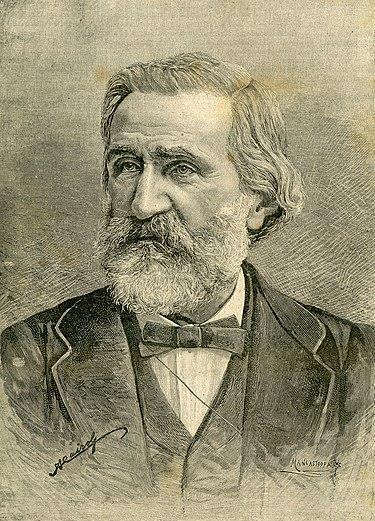

#### **Wolfgang Amadeus Mozart**
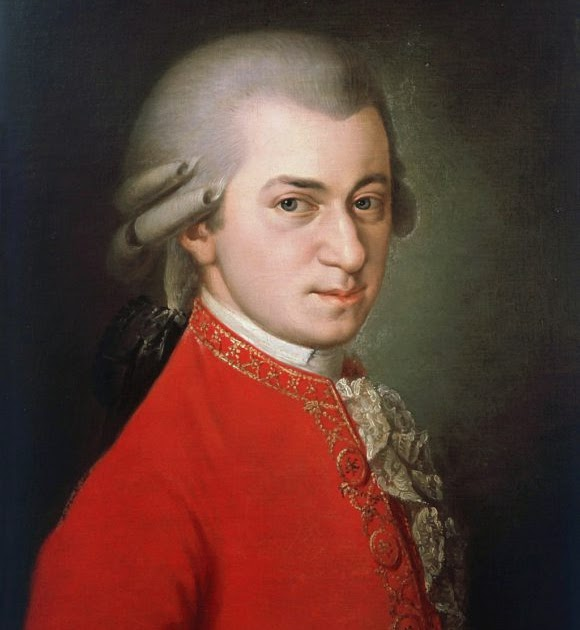

#### **Igor Stravinsky**
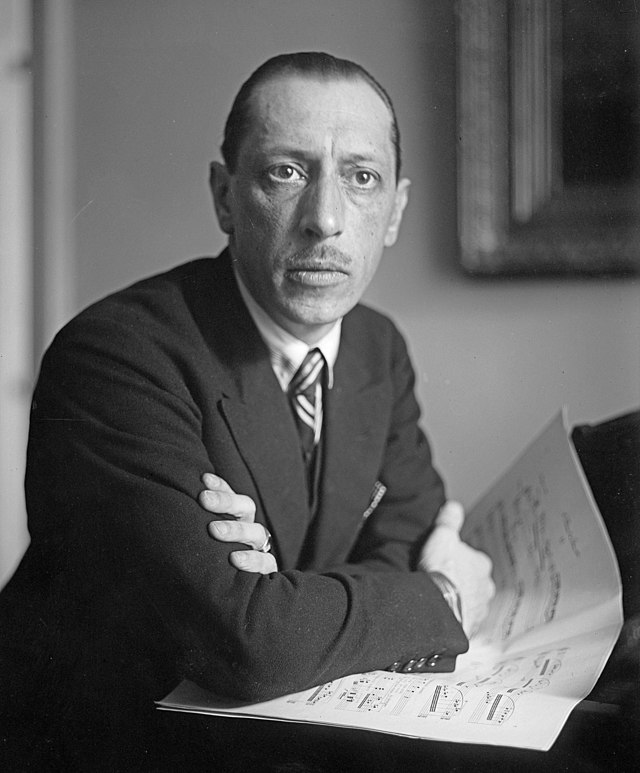

### Any suggestions by you?